In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

import shap
import matplotlib
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
pd.options.display.float_format = '{:.5f}'.format

#### 데이터 불러오기 및 컬럼명, 값 수정

In [3]:
df_2021 = pd.read_csv("2021 주거실태조사 일반가구.csv", encoding='cp949')
df_2020 = pd.read_csv("2020_일반가구_20230523_33481.csv", encoding='cp949')
df_2019 = pd.read_csv("2019년 주거실태조사.csv", encoding='cp949')
df_2018 = pd.read_csv("2018년 주거실태조사.csv", encoding='cp949')

df_2021.columns = df_2021.columns.str.strip()
df_2020.columns = df_2020.columns.str.strip()
df_2019.columns = df_2019.columns.str.strip()
df_2018.columns = df_2018.columns.str.strip()

In [4]:
df_2018['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?'].value_counts(), df_2018['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?'].isnull().sum()

(문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?
 10.00000         580
 5.00000          576
 3.00000          178
 2.00000          166
 7.00000           94
 15.00000          74
 20.00000          66
 1.00000           65
 4.00000           57
 6.00000           56
 8.00000           49
 30.00000          14
 9.00000           12
 12.00000           8
 13.00000           6
 25.00000           4
 18.00000           3
 0.00000            2
 9999999.00000      2
 14.00000           1
 16.00000           1
 Name: count, dtype: int64,
 59261)

In [5]:
df_2018['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?'].dtype

dtype('float64')

In [6]:
df_2018 = df_2018[df_2018['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?'] != 9999999]

In [7]:
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':10.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':5.0},'5~10년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':2.0},'1~3년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':3.0},'3~5년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':7.0},'5~10년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':15.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':20.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':1.0},'1~3년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':6.0},'5~10년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':4.0},'3~5년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':8.0},'5~10년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':30.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':9.0},'5~10년')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':12.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':13.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':25.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':18.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':14.0},'10년 이상')
df_2018 = df_2018.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':16.0},'10년 이상')

In [8]:
df_2019.rename(columns = {'문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 부동산 자산(만원)':'문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 총 부동산 자산(만원)'}, inplace=True)
df_2019.rename(columns = {'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오.':'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위'}, inplace=True)
df_2019.rename(columns = {'(M)2 문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오.':'(M)2 문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._2순위'}, inplace=True)


df_2018.rename(columns = {'문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 부동산 자산(만원)':'문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 총 부동산 자산(만원)'}, inplace=True)
df_2018.rename(columns = {'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오.':'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위'}, inplace=True)
df_2018.rename(columns = {'문39. 귀 댁의 현재 상황을 고려할 때, 아래 보기의 주거지원 프로그램이 필요하다고 생각하십니까?':'문39. 귀 댁의 현재 상황을 고려할 때, 아래의 주거지원 프로그램이 필요하다고 생각하십니까?'}, inplace=True)


#### 무주택 가구 추출 및 이미 공공임대주택에 거주 중인 가구 제외

In [9]:
df_2021 = df_2021[df_2021['문8. 귀 댁은 가구주께서 가구주가 된 이후에 지금까지 한 번이라도 자가주택을 마련한 적이 있습니까?']==2]
df_2020 = df_2020[df_2020['문8. 귀 댁은 가구주께서 가구주가 된 이후에 지금까지 한 번이라도 자가주택을 마련한 적이 있습니까?']==2]
df_2019 = df_2019[df_2019['문8. 귀 댁은 가구주께서 가구주가 된 이후에 지금까지 한 번이라도 자가주택을 마련한 적이 있습니까?']==2]
df_2018 = df_2018[df_2018['문8. 귀 댁은 가구주께서 가구주가 된 이후에 지금까지 한 번이라도 자가주택을 마련한 적이 있습니까?']==2]

In [10]:
df_2021 = df_2021[df_2021['문9. 귀 가구는 지금 사는 곳 이외에 가구주나 가구원의 이름으로 보유한 주택이 있습니까?']==2]
df_2020 = df_2020[df_2020['문9. 귀 가구는 지금 사는 곳 이외에 가구주나 가구원의 이름으로 보유한 주택이 있습니까?']==2]
df_2019 = df_2019[df_2019['문9. 귀 가구는 지금 사는 곳 이외에 가구주나 가구원의 이름으로 보유한 주택이 있습니까?']==2]
df_2018 = df_2018[df_2018['문9. 귀 가구는 지금 사는 곳 이외에 가구주나 가구원의 이름으로 보유한 주택이 있습니까?']==2]

In [11]:
## 이미 공공임대주택에 거주 중인 가구 제외
df_2021 = df_2021[df_2021['문14. 현재 살고 계신 임대주택은 어떤 유형입니까?_1) 유형'] != 2]
df_2020 = df_2020[df_2020['문14. 현재 살고 계신 임대주택은 어떤 유형입니까?_1) 유형'] != 2]
df_2019 = df_2019[df_2019['문14. 현재 살고 계신 임대주택은 어떤 유형입니까?_1) 유형'] != 2]
df_2018 = df_2018[df_2018['문14. 현재 살고 계신 임대주택은 어떤 유형입니까?_1) 유형'] != 2]

In [12]:
df_2021 = df_2021.reset_index(drop=True)
df_2020 = df_2020.reset_index(drop=True)
df_2019 = df_2019.reset_index(drop=True)
df_2018 = df_2018.reset_index(drop=True)

#### 소득 대비 주택 임대료 비율(주택 임대료에 대한 부담)계산

In [13]:
## 임차료 보증금(만원) 들어간 응답없음, 모름인 9999999 제거
df_2021 = df_2021[df_2021['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] != 9999999]
df_2020 = df_2020[df_2020['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] != 9999999]
df_2019 = df_2019[df_2019['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] != 9999999]
df_2018 = df_2018[df_2018['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] != 9999999]

## 임차료 월세(만원) 들어간 응답없음, 모름인 9999999 제거
df_2021 = df_2021[df_2021['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'] != 9999999]
df_2020 = df_2020[df_2020['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'] != 9999999]
df_2019 = df_2019[df_2019['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'] != 9999999]
df_2018 = df_2018[df_2018['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'] != 9999999]

In [14]:
df_2021['year'] = 2021
df_2020['year'] = 2020
df_2019['year'] = 2019
df_2018['year'] = 2018

## 월세이율 출처 2021년 주거실태조사 요약보고서
df_2021['월세이율'] = 5.60
df_2020['월세이율'] = 5.70
df_2019['월세이율'] = 6.10
df_2018['월세이율'] = 6.20

In [15]:
df_2021 = df_2021[df_2021['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'] != 9999999]
df_2020 = df_2020[df_2020['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'] != 9999999]
df_2019 = df_2019[df_2019['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'] != 9999999]
df_2018 = df_2018[df_2018['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'] != 9999999]

In [16]:
# 현주택 거주기간 계산
df_2021['현주택 거주기간(총 개월)'] = (df_2021['year'] - df_2021['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'])*12
df_2020['현주택 거주기간(총 개월)'] = (df_2020['year'] - df_2020['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'])*12
df_2019['현주택 거주기간(총 개월)'] = (df_2019['year'] - df_2019['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'])*12
df_2018['현주택 거주기간(총 개월)'] = (df_2018['year'] - df_2018['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도'])*12

In [17]:
## 계산 위해 0인 값 1로 대체
df_2021.loc[df_2021['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] == 0, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] = 1
df_2020.loc[df_2020['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] == 0, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] = 1
df_2019.loc[df_2019['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] == 0, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] = 1
df_2018.loc[df_2018['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] == 0, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] = 1

In [18]:
df_2021.loc[df_2021['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 2, 
            '전세 주택 월 임대료'] = (df_2021['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2021['월세이율'] / 12 / 100)
df_2021['전세 소득 대비 주택 임대료 비율'] = (df_2021['전세 주택 월 임대료'] / df_2021['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2021['전세 소득 대비 주택 임대료 비율']=df_2021['전세 소득 대비 주택 임대료 비율'].fillna(0)

df_2021.loc[df_2021['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '보증금 월세 이율'] = (df_2021['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2021['월세이율'] / 12 / 100)
df_2021.loc[df_2021['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '환산 주택 월 임대료(만원)'] = (df_2021['보증금 월세 이율'] + df_2021['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'])
df_2021.loc[df_2021['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '월세 소득 대비 주택 임대료 비율'] = (df_2021['환산 주택 월 임대료(만원)'] / df_2021['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2021['월세 소득 대비 주택 임대료 비율']=df_2021['월세 소득 대비 주택 임대료 비율'].fillna(0)

condition_2021_456 = df_2021['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'].isin([4, 5, 6])

df_2021.loc[condition_2021_456, '월 임대료(만원)'] = df_2021.loc[condition_2021_456, '문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)']
df_2021.loc[condition_2021_456, '기타 소득 대비 주택 임대료 비율'] = (
    df_2021.loc[condition_2021_456, '월 임대료(만원)'] / df_2021.loc[condition_2021_456, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100
)
df_2021['기타 소득 대비 주택 임대료 비율']=df_2021['기타 소득 대비 주택 임대료 비율'].fillna(0)

condition_2021_7 = df_2021['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 7

df_2021.loc[condition_2021_7, '무상 소득 대비 주택 임대료 비율'] = 0
df_2021['무상 소득 대비 주택 임대료 비율']=df_2021['무상 소득 대비 주택 임대료 비율'].fillna(0)

In [19]:
df_2020.loc[df_2020['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 2, 
            '전세 주택 월 임대료'] = (df_2020['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2020['월세이율'] / 12 / 100)
df_2020['전세 소득 대비 주택 임대료 비율'] = (df_2020['전세 주택 월 임대료'] / df_2020['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2020['전세 소득 대비 주택 임대료 비율']=df_2020['전세 소득 대비 주택 임대료 비율'].fillna(0)

df_2020.loc[df_2020['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '보증금 월세 이율'] = (df_2020['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2020['월세이율'] / 12 / 100)
df_2020.loc[df_2020['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '환산 주택 월 임대료(만원)'] = (df_2020['보증금 월세 이율'] + df_2020['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'])
df_2020.loc[df_2020['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '월세 소득 대비 주택 임대료 비율'] = (df_2020['환산 주택 월 임대료(만원)'] / df_2020['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2020['월세 소득 대비 주택 임대료 비율']=df_2020['월세 소득 대비 주택 임대료 비율'].fillna(0)

condition_2020_456 = df_2020['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'].isin([4, 5, 6])

df_2020.loc[condition_2020_456, '월 임대료(만원)'] = df_2020.loc[condition_2020_456, '문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)']
df_2020.loc[condition_2020_456, '기타 소득 대비 주택 임대료 비율'] = (
    df_2020.loc[condition_2020_456, '월 임대료(만원)'] / df_2020.loc[condition_2020_456, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100
)
df_2020['기타 소득 대비 주택 임대료 비율']=df_2020['기타 소득 대비 주택 임대료 비율'].fillna(0)

condition_2020_7 = df_2020['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 7

df_2020.loc[condition_2020_7, '무상 소득 대비 주택 임대료 비율'] = 0
df_2020['무상 소득 대비 주택 임대료 비율']=df_2020['무상 소득 대비 주택 임대료 비율'].fillna(0)

In [20]:
df_2019.loc[df_2019['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 2, 
            '전세 주택 월 임대료'] = (df_2019['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2019['월세이율'] / 12 / 100)
df_2019['전세 소득 대비 주택 임대료 비율'] = (df_2019['전세 주택 월 임대료'] / df_2019['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2019['전세 소득 대비 주택 임대료 비율']=df_2019['전세 소득 대비 주택 임대료 비율'].fillna(0)

df_2019.loc[df_2019['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '보증금 월세 이율'] = (df_2019['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2019['월세이율'] / 12 / 100)
df_2019.loc[df_2019['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '환산 주택 월 임대료(만원)'] = (df_2019['보증금 월세 이율'] + df_2019['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'])
df_2019.loc[df_2019['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '월세 소득 대비 주택 임대료 비율'] = (df_2019['환산 주택 월 임대료(만원)'] / df_2019['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2019['월세 소득 대비 주택 임대료 비율']=df_2019['월세 소득 대비 주택 임대료 비율'].fillna(0)

condition_2019_456 = df_2019['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'].isin([4, 5, 6])

df_2019.loc[condition_2019_456, '월 임대료(만원)'] = df_2019.loc[condition_2019_456, '문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)']
df_2019.loc[condition_2019_456, '기타 소득 대비 주택 임대료 비율'] = (
    df_2019.loc[condition_2019_456, '월 임대료(만원)'] / df_2019.loc[condition_2019_456, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100
)
df_2019['기타 소득 대비 주택 임대료 비율']=df_2019['기타 소득 대비 주택 임대료 비율'].fillna(0)

condition_2019_7 = df_2019['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 7

df_2019.loc[condition_2019_7, '무상 소득 대비 주택 임대료 비율'] = 0
df_2019['무상 소득 대비 주택 임대료 비율']=df_2019['무상 소득 대비 주택 임대료 비율'].fillna(0)

In [21]:
df_2018.loc[df_2018['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 2, 
            '전세 주택 월 임대료'] = (df_2018['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2018['월세이율'] / 12 / 100)
df_2018['전세 소득 대비 주택 임대료 비율'] = (df_2018['전세 주택 월 임대료'] / df_2018['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2018['전세 소득 대비 주택 임대료 비율']=df_2018['전세 소득 대비 주택 임대료 비율'].fillna(0)

df_2018.loc[df_2018['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '보증금 월세 이율'] = (df_2018['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_보증금(만원)'] * df_2018['월세이율'] / 12 / 100)
df_2018.loc[df_2018['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '환산 주택 월 임대료(만원)'] = (df_2018['보증금 월세 이율'] + df_2018['문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)'])
df_2018.loc[df_2018['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 3, '월세 소득 대비 주택 임대료 비율'] = (df_2018['환산 주택 월 임대료(만원)'] / df_2018['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100)
df_2018['월세 소득 대비 주택 임대료 비율']=df_2018['월세 소득 대비 주택 임대료 비율'].fillna(0)

condition_2018_456 = df_2018['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'].isin([4, 5, 6])

df_2018.loc[condition_2018_456, '월 임대료(만원)'] = df_2018.loc[condition_2018_456, '문15. 현재 살고 계신 주택의 임차료는 얼마입니까?_월세(만원)']
df_2018.loc[condition_2018_456, '기타 소득 대비 주택 임대료 비율'] = (
    df_2018.loc[condition_2018_456, '월 임대료(만원)'] / df_2018.loc[condition_2018_456, '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'] * 100
)
df_2018['기타 소득 대비 주택 임대료 비율']=df_2018['기타 소득 대비 주택 임대료 비율'].fillna(0)

condition_2018_7 = df_2018['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] == 7

df_2018.loc[condition_2018_7, '무상 소득 대비 주택 임대료 비율'] = 0
df_2018['무상 소득 대비 주택 임대료 비율']=df_2018['무상 소득 대비 주택 임대료 비율'].fillna(0)

In [22]:
df_2021['소득 대비 주택 임대료 비율'] = (
    df_2021['전세 소득 대비 주택 임대료 비율'] +
    df_2021['월세 소득 대비 주택 임대료 비율'] +
    df_2021['기타 소득 대비 주택 임대료 비율'] +
    df_2021['무상 소득 대비 주택 임대료 비율']
)
df_2020['소득 대비 주택 임대료 비율'] = (
    df_2020['전세 소득 대비 주택 임대료 비율'] +
    df_2020['월세 소득 대비 주택 임대료 비율'] +
    df_2020['기타 소득 대비 주택 임대료 비율'] +
    df_2020['무상 소득 대비 주택 임대료 비율']
)


df_2019['소득 대비 주택 임대료 비율'] = (
    df_2019['전세 소득 대비 주택 임대료 비율'] +
    df_2019['월세 소득 대비 주택 임대료 비율'] +
    df_2019['기타 소득 대비 주택 임대료 비율'] +
    df_2019['무상 소득 대비 주택 임대료 비율']
)

df_2018['소득 대비 주택 임대료 비율'] = (
    df_2018['전세 소득 대비 주택 임대료 비율'] +
    df_2018['월세 소득 대비 주택 임대료 비율'] +
    df_2018['기타 소득 대비 주택 임대료 비율'] +
    df_2018['무상 소득 대비 주택 임대료 비율']
)

## 임차료 및 대출금 부담
## 대출금 부담은 부담지표로 하면 되고, 임차료 부담은 소득 대비 주택 임차료
### 월세 이율은 여기서 참고함 file:///C:/Users/jaehy/Downloads/2021%EB%85%84%EB%8F%84_%EC%A3%BC%EA%B1%B0%EC%8B%A4%ED%83%9C%EC%A1%B0%EC%82%AC_%EC%9A%94%EC%95%BD%EB%B3%B4%EA%B3%A0%EC%84%9C_%EC%B5%9C%EC%A2%85%20(1).pdf
### 2021 주거실태조사 요약보고서는 참고문헌에 넣어야 함

#### 연구 대상인 서민층 및 중산층 추출

In [23]:
df_2021['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'] = df_2021['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)']*10000
df_2020['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'] = df_2020['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)']*10000
df_2019['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'] = df_2019['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)']*10000
df_2018['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'] = df_2018['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)']*10000

In [24]:
def income_2021(income, category):
    if category == 1:
        if income <= 878597:
            return "서민층"
        elif 878597 < income <= 2635791:
            return "중산층"
        else:
            return "상류층"
    elif category == 2:
        if income <= 1495990:
            return "서민층"
        elif 1495990 < income <= 4487970:
            return "중산층"
        else:
            return "상류층"
    elif category == 3:
        if income <= 1935288.5:
            return "서민층"
        elif 1935288.5 < income <= 5805865.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 4:
        if income <= 2374587:
            return "서민층"
        elif 2374587 < income <= 7123761:
            return "중산층"
        else:
            return "상류층"        
    elif category == 5:
        if income <= 2813885.5:
            return "서민층"
        elif 2813885.5 < income <= 8441656.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 6:
        if income <= 3253184:
            return "서민층"
        elif 3253184 < income <= 9759552:
            return "중산층"
        else:
            return "상류층"        
    elif category == 7:
        if income <= 3694857.5:
            return "서민층"
        elif 3694857.5 < income <= 11084572.5:
            return "중산층"
        else:
            return "상류층"     
    elif category == 8:
        if income <=  4136531:
            return "서민층"
        elif 4136531 < income <= 12409593:
            return "중산층"
        else:
            return "상류층"   
    elif category == 9:
        if income <= 4578204.5:
            return "서민층"
        elif 4578204.5 < income <= 13734613.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 10:
        if income <= 5019878:
            return "서민층"
        elif 5019878 < income <= 15059634:
            return "중산층"
        else:
            return "상류층"
    else:
        return "유효하지 않은 카테고리"

# '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)' 컬럼을 기반으로 '소득계층'이라는 새로운 컬럼 생성
df_2021['소득계층'] = df_2021.apply(lambda row: income_2021(row['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'], row['문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.']), axis=1)

In [25]:
def income_2020(income, category): ## 2019년 기준 중위소득으로 계산
    if category == 1:
        if income <= 853504:
            return "서민층"
        elif 853504 < income <= 2560512:
            return "중산층"
        else:
            return "상류층"
    elif category == 2:
        if income <= 1453264:
            return "서민층"
        elif 1453264 < income <= 4359792:
            return "중산층"
        else:
            return "상류층"
    elif category == 3:
        if income <= 1880016:
            return "서민층"
        elif 1880016 < income <= 5640048:
            return "중산층"
        else:
            return "상류층"        
    elif category == 4:
        if income <= 2306768:
            return "서민층"
        elif 2306768 < income <= 6920304:
            return "중산층"
        else:
            return "상류층"        
    elif category == 5:
        if income <= 2733520:
            return "서민층"
        elif 2733520 < income <= 8200560:
            return "중산층"
        else:
            return "상류층"        
    elif category == 6:
        if income <= 3160272:
            return "서민층"
        elif 3160272 < income <= 9480816:
            return "중산층"
        else:
            return "상류층"        
    elif category == 7:
        if income <= 3587024:
            return "서민층"
        elif 3587024 < income <= 10761072:
            return "중산층"
        else:
            return "상류층"     

        return "유효하지 않은 카테고리"

# '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)' 컬럼을 기반으로 '소득계층'이라는 새로운 컬럼 생성
df_2020['소득계층'] = df_2020.apply(lambda row: income_2020(row['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'], row['문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.']), axis=1)

In [26]:
def income_2019(income, category): ## 2018년 기준 중위소득으로 계산
    if category == 1:
        if income <= 1672105*0.5:
            return "서민층"
        elif 1672105*0.5 < income <= 1672105*1.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 2:
        if income <= 2847097*0.5:
            return "서민층"
        elif 2847097*0.5 < income <= 2847097*1.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 3:
        if income <= 3683150*0.5:
            return "서민층"
        elif 3683150*0.5 < income <= 3683150*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 4:
        if income <= 4519202*0.5:
            return "서민층"
        elif 4519202*0.5 < income <= 4519202*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 5:
        if income <= 5355254*0.5:
            return "서민층"
        elif 5355254*0.5 < income <= 5355254*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 6:
        if income <= 6191307*0.5:
            return "서민층"
        elif 6191307*0.5 < income <= 6191307*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 7:
        if income <= 7027359*0.5:
            return "서민층"
        elif 7027359*0.5 < income <= 7027359*1.5:
            return "중산층"
        else:
            return "상류층"     
    elif category == 8:
        if income <= 7863411*0.5:
            return "서민층"
        elif 7863411*0.5 < income <= 7863411*1.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 9:
        if income <= 8699463*0.5:
            return "서민층"
        elif 8699463*0.5 < income <= 8699463*1.5:
            return "중산층"
        else:
            return "상류층"        
        return "유효하지 않은 카테고리"

# '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)' 컬럼을 기반으로 '소득계층'이라는 새로운 컬럼 생성
df_2019['소득계층'] = df_2019.apply(lambda row: income_2019(row['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'], row['문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.']), axis=1)

In [27]:
def income_2018(income, category): ## 2017년 기준 중위소득으로 계산
    if category == 1:
        if income <= 1652931*0.5:
            return "서민층"
        elif 1652931*0.5 < income <= 1652931*1.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 2:
        if income <= 2814449*0.5:
            return "서민층"
        elif 2814449*0.5 < income <= 2814449*1.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 3:
        if income <= 3640915*0.5:
            return "서민층"
        elif 3640915*0.5 < income <= 3640915*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 4:
        if income <= 4467380*0.5:
            return "서민층"
        elif 4467380*0.5 < income <= 4467380*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 5:
        if income <= 5293845*0.5:
            return "서민층"
        elif 5293845*0.5 < income <= 5293845*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 6:
        if income <= 6120311*0.5:
            return "서민층"
        elif 6120311*0.5 < income <= 6120311*1.5:
            return "중산층"
        else:
            return "상류층"        
    elif category == 7:
        if income <= 6946776*0.5:
            return "서민층"
        elif 6946776*0.5 < income <= 6946776*1.5:
            return "중산층"
        else:
            return "상류층"     
    elif category == 8:
        if income <= 7773241*0.5:
            return "서민층"
        elif 7773241*0.5 < income <= 7773241*1.5:
            return "중산층"
        else:
            return "상류층"
    elif category == 9:
        if income <= 8599706*0.5:
            return "서민층"
        elif 8599706*0.5 < income <= 8599706*1.5:
            return "중산층"
        else:
            return "상류층"        
        return "유효하지 않은 카테고리"

# '문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)' 컬럼을 기반으로 '소득계층'이라는 새로운 컬럼 생성
df_2018['소득계층'] = df_2018.apply(lambda row: income_2018(row['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)2'], row['문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.']), axis=1)

In [28]:
df_2021 = df_2021[df_2021['소득계층']!='상류층']
df_2020 = df_2020[df_2020['소득계층']!='상류층']
df_2019 = df_2019[df_2019['소득계층']!='상류층']
df_2018 = df_2018[df_2018['소득계층']!='상류층']

#### 연도별 데이터 결합

In [29]:
# 각 데이터프레임의 컬럼명 추출
columns_df1 = set(df_2021.columns)
columns_df2 = set(df_2020.columns)
columns_df3 = set(df_2019.columns)
columns_df4 = set(df_2018.columns)

# 공통된 컬럼명 추출
common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

# 각 데이터프레임에서 공통된 컬럼만 선택
df1_common = df_2021[list(common_columns)]
df2_common = df_2020[list(common_columns)]
df3_common = df_2019[list(common_columns)]
df4_common = df_2018[list(common_columns)]

# 공통된 컬럼명을 기준으로 데이터프레임 결합
df = pd.concat([df1_common, df2_common, df3_common, df4_common], ignore_index=True, sort=False)

#### 모름 응답(9999999) 제거

In [30]:
df_2019['문37. 귀 댁은 현재와 비교했을 때 더 넓은 곳으로 이사할 계획이십니까? 더 좁은 곳으로 이사할 계획이십니까?']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15506   NaN
15507   NaN
15509   NaN
15510   NaN
15511   NaN
Name: 문37. 귀 댁은 현재와 비교했을 때 더 넓은 곳으로 이사할 계획이십니까? 더 좁은 곳으로 이사할 계획이십니까?, Length: 13320, dtype: float64

In [31]:
# 종속변수 
df = df[df['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?']!=9999999]

# 현재 거주지
df = df[df['시도']!=9999999]
# 현재주택 유형
df = df[df['문4. 귀 댁의 주택 유형은 무엇입니까?']!=9999999]
# 현재주택 위치
df = df[df['문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?']!=9999999]
# 무주택 기간
df = df[df['문9-1. 가구주가 된 이후 무주택 기간은 얼마나 되십니까?_총 개월']!=9999999]
# 점유형태
df = df[df['문7. 귀 댁의 점유형태는 어디에 해당됩니까?']!=9999999]
# 현재주택 구조
df = df[df['문20. 귀 댁의 주택 구조는 어떻습니까?']!=9999999]
# 현재주택 면적
df = df[df['문21. 귀 댁이 거주하시는 곳의 주택면적은 얼마입니까?_1)주택사용면적(전용면적)_㎡']!=9999999]
# 주거환경 만족도
df = df[df['문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태']!=9999999]
df = df[df['문24. 현재주택 주거환경 만족도_13) 대기오염 정도']!=9999999]
# 주택에 대한 전반적인 만족도
df = df[df['문25. 주택에 대한 전반적인 만족도']!=9999999]
# 이사 횟수
df = df[df['문26-1. 귀 댁의 가구주께서 가구주가 된 이후를 기준으로 했을 때, 현재주택에 거주하기까지 몇 번 이사를 하셨습니까?_회']!=9999999]
# 이사 예상 기간
df = df[df['문33-1. 몇 년 안에 이사가실 계획 입니까?']!=9999999]
# 이사계획 첫 번째 이유 
df = df[df['문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.']!=9999999]
# 이사계획 중인 지역
df = df[df['문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도']!=9999999]
# 이사계획 중인 주택유형
df = df[df['문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?']!=9999999]
# 이사계획 중인 점유형태
df = df[df['문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?']!=9999999]
# 이사계획 중인 주택규모, 2018년 자료에 해당 조사 결과가 없음
#df = df[df['문37. 귀 댁은 현재와 비교했을 때 더 넓은 곳으로 이사할 계획이십니까? 더 좁은 곳으로 이사할 계획이십니까?']!=9999999]
# 주택보유의식
df = df[df['문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?']!=9999999]
# 가장 필요한 주거지원 1순위
df = df[df['문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위']!=9999999]
# 가구주 나이
df = df[df['가구 구성원 No.1_우리나라나이']!=9999999]
# 가구주 성별
df = df[df['가구 구성원 No.1_성별']!=9999999]
# 가구주 주민등록상 등제 여부
df = df[df['가구 구성원 No.1_주민등록상 등재여부']!=9999999]
# 가구주 주민등록상 등제 여부
df = df[df['가구 구성원 No.1_실제 동거여부']!=9999999]
# 가구주 장애여부
df = df[df['가구 구성원 No.1_장애여부']!=9999999]
# 총 가구원 수
df = df[df['문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.']!=9999999]
# 국민기초생활보장 수급가구 여부
df = df[df['문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?']!=9999999]
# 소득계층은 파생변수
## 소득, 생활비, 주거관리비 자산, 부채 등
df = df[df['문49. 지난 1년간의 월평균 가구 소득_1) 근로/사업소득(만원)']!=9999999]
df = df[df['문49. 지난 1년간의 월평균 가구 소득_2) 재산소득(만원)']!=9999999]
df = df[df['문49. 지난 1년간의 월평균 가구 소득_3) 사회보험 수혜금(만원)']!=9999999]
df = df[df['문49. 지난 1년간의 월평균 가구 소득_4) 정부 보조금(만원)']!=9999999]
df=  df[df['문49. 지난 1년간의 월평균 가구 소득_5) 사적이전소득(만원)']!=9999999]
df = df[df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1) 월평균 총 생활비(만원)']!=9999999]
df = df[df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(3) 하절기 월평균 주거관리비(6월~9월)']!=9999999]
df = df[df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(2) 간절기 월평균 주거관리비(4,5,10,11월)']!=9999999]
df = df[df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(1) 동절기 월평균 주거관리비(12월~3월)']!=9999999]
df = df[df['문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 총 부동산 자산(만원)']!=9999999]
df = df[df['문52. 귀 가구의 총 자산은 어느 정도입니까?_2) 총 금융자산(만원)']!=9999999]
df = df[df['문52. 귀 가구의 총 자산은 어느 정도입니까?_3) 총 기타자산(만원)']!=9999999]
df = df[df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_1) 금융기관 대출금(만원)']!=9999999]
df = df[df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_2) 비금융기관 대출금(만원)']!=9999999]
df = df[df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_3) 부동산 소유자로서 받는 임대 보증금(만원)']!=9999999]
# 가구주 학력
df = df[df['배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.']!=9999999]
# 가구주 종사상 지위
df = df[df['배문2-2. 다음 중 어떤 근무형태에 해당하십니까?']!=9999999]

In [32]:
df.shape

(45065, 326)

In [33]:
# 이사 x  == 이사 0번
df['문26-1. 귀 댁의 가구주께서 가구주가 된 이후를 기준으로 했을 때, 현재주택에 거주하기까지 몇 번 이사를 하셨습니까?_회'] = df['문26-1. 귀 댁의 가구주께서 가구주가 된 이후를 기준으로 했을 때, 현재주택에 거주하기까지 몇 번 이사를 하셨습니까?_회'].fillna(0)

In [34]:
df[['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1) 월평균 총 생활비(만원)',
   '문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(4) 월 평균 주거관리비',
   '문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(3) 하절기 월평균 주거관리비(6월~9월)',
   '문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(2) 간절기 월평균 주거관리비(4,5,10,11월)',
   '문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(1) 동절기 월평균 주거관리비(12월~3월)']]

,문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1) 월평균 총 생활비(만원),문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(4) 월 평균 주거관리비,문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(3) 하절기 월평균 주거관리비(6월~9월),"문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(2) 간절기 월평균 주거관리비(4,5,10,11월)",문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(1) 동절기 월평균 주거관리비(12월~3월)
0,80.00000,8.00000,8.00000,8.00000,8.00000
1,100.00000,18.33333,20.00000,15.00000,20.00000
2,65.00000,3.66667,3.00000,1.00000,7.00000
3,30.00000,6.00000,5.00000,6.00000,7.00000
4,30.00000,5.66667,4.00000,4.00000,9.00000
...,...,...,...,...,...
46909,120.00000,12.00000,15.00000,7.00000,15.00000
46910,500.00000,23.00000,30.00000,10.00000,30.00000
46911,200.00000,18.00000,20.00000,13.00000,20.00000
46912,250.00000,15.00000,15.00000,9.00000,20.00000


In [35]:
df['월평균 주거관리비'] =  (df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(3) 하절기 월평균 주거관리비(6월~9월)'] + 
df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(2) 간절기 월평균 주거관리비(4,5,10,11월)'] +
df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(1) 동절기 월평균 주거관리비(12월~3월)']) / 3

In [36]:
## 확인
df[['월평균 주거관리비','문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(4) 월 평균 주거관리비']]

,월평균 주거관리비,문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1)-(4) 월 평균 주거관리비
0,8.00000,8.00000
1,18.33333,18.33333
2,3.66667,3.66667
3,6.00000,6.00000
4,5.66667,5.66667
...,...,...
46909,12.33333,12.00000
46910,23.33333,23.00000
46911,17.66667,18.00000
46912,14.66667,15.00000


In [37]:
## 부채 없는 가구 0으로 대체
df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_1) 금융기관 대출금(만원)'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_1) 금융기관 대출금(만원)'].fillna(0)
df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_2) 비금융기관 대출금(만원)'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_2) 비금융기관 대출금(만원)'].fillna(0)
df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_3) 부동산 소유자로서 받는 임대 보증금(만원)'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_3) 부동산 소유자로서 받는 임대 보증금(만원)'].fillna(0)
df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'].fillna(0)

In [38]:
df['총 소득 대비 근로 및 사업소득의 비중'] = (df['문49. 지난 1년간의 월평균 가구 소득_1) 근로/사업소득(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100
df['총 소득 대비 재산소득의 비중'] = (df['문49. 지난 1년간의 월평균 가구 소득_2) 재산소득(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100
df['총 소득 대비 사회보험 수혜금의 비중'] = (df['문49. 지난 1년간의 월평균 가구 소득_3) 사회보험 수혜금(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100
df['총 소득 대비 정부 보조금의 비중'] = (df['문49. 지난 1년간의 월평균 가구 소득_4) 정부 보조금(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100
df['총 소득 대비 사적이전소득의 비중'] = (df['문49. 지난 1년간의 월평균 가구 소득_5) 사적이전소득(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100

In [39]:
df['총 소득 대비 생활비의 비중'] = (df['문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1) 월평균 총 생활비(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100
df['총 소득 대비 월평균 주거관리비의 비중'] = (df['월평균 주거관리비'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)'])*100

In [40]:
## inf값 방지
df.loc[df['문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)'] == 0, '문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)'] = 1
df.loc[df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'] == 0, '문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'] = 1

In [41]:
df['총 자산 대비 부동산 자산의 비중'] = (df['문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 총 부동산 자산(만원)'] / df['문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)'])*100
## 총 자산 대비 금융자산의 비중은 유동성지표
## 유동성지표는 총자산에서 유동성이 높은 금융자산이 차지하는 비중
## 이 지표는 긴급사태에 대처하거나 노년기가계와 같이 자산소득에 의존하여 생활하는 경우 중요하게 다루어지는 지표이며,
## 자산의 증대를 극대화하기 위한 대기자금을 평가하는데 이용 가능
df['총 자산 대비 금융자산의 비중'] = (df['문52. 귀 가구의 총 자산은 어느 정도입니까?_2) 총 금융자산(만원)'] / df['문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)'])*100
df['총 자산 대비 기타자산의 비중'] = (df['문52. 귀 가구의 총 자산은 어느 정도입니까?_3) 총 기타자산(만원)'] / df['문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)'])*100

In [42]:
df['총 부채 대비 금융기관 대출금의 비중'] = (df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_1) 금융기관 대출금(만원)'] / df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)']) *100
df['총 부채 대비 비금융기관 대출금의 비중'] = (df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_2) 비금융기관 대출금(만원)'] / df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)']) *100
df['총 부채 대비 임대 보증금의 비중'] = (df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_3) 부동산 소유자로서 받는 임대 보증금(만원)'] / df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)']) *100

In [43]:
df.loc[df['문52. 귀 가구의 총 자산은 어느 정도입니까?_2) 총 금융자산(만원)'] == 0, '문52. 귀 가구의 총 자산은 어느 정도입니까?_2) 총 금융자산(만원)'] = 1

In [44]:
df['중기부채부담지표'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'] / df['문52. 귀 가구의 총 자산은 어느 정도입니까?_2) 총 금융자산(만원)']
df['장기부채부담지표'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'] / df['문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)']
#df['총 소득 대비 총 부채'] = df['문53-1. 현재 귀 댁의 부채는 얼마입니까?_4) 총 부채(만원)'] / df['문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)']

In [45]:
df=df.replace({'시도':11},'서울특별시')
df=df.replace({'시도':21},'부산광역시')
df=df.replace({'시도':22},'대구광역시')
df=df.replace({'시도':23},'인천광역시')
df=df.replace({'시도':24},'광주광역시')
df=df.replace({'시도':25},'대전광역시')
df=df.replace({'시도':26},'울산광역시')
df=df.replace({'시도':29},'세종특별자치시')
df=df.replace({'시도':31},'경기도')
df=df.replace({'시도':32},'강원도')
df=df.replace({'시도':33},'충청북도')
df=df.replace({'시도':34},'충청남도')
df=df.replace({'시도':35},'전라북도')
df=df.replace({'시도':36},'전라남도')
df=df.replace({'시도':37},'경상북도')
df=df.replace({'시도':38},'경상남도')
df=df.replace({'시도':39},'제주특별자치도')

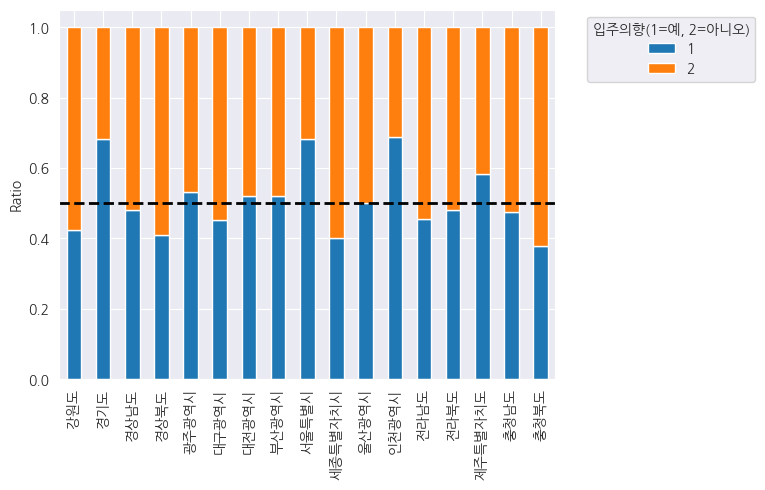

In [46]:
ratio_df = df.groupby('시도')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()

# 비율 시각화
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [47]:
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':1},'일반 단독주택')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':2},'다가구 단독주택')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':3},'영업겸용 단독주택')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':4},'아파트')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':5},'연립주택')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':6},'다세대주택')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':7},'비거주용 건물 내 주택')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':8},'오피스텔')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':9},'고시원')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':10},'판잣집 비닐하우스 컨테이너 움막')
df=df.replace({'문4. 귀 댁의 주택 유형은 무엇입니까?':11},'기타')

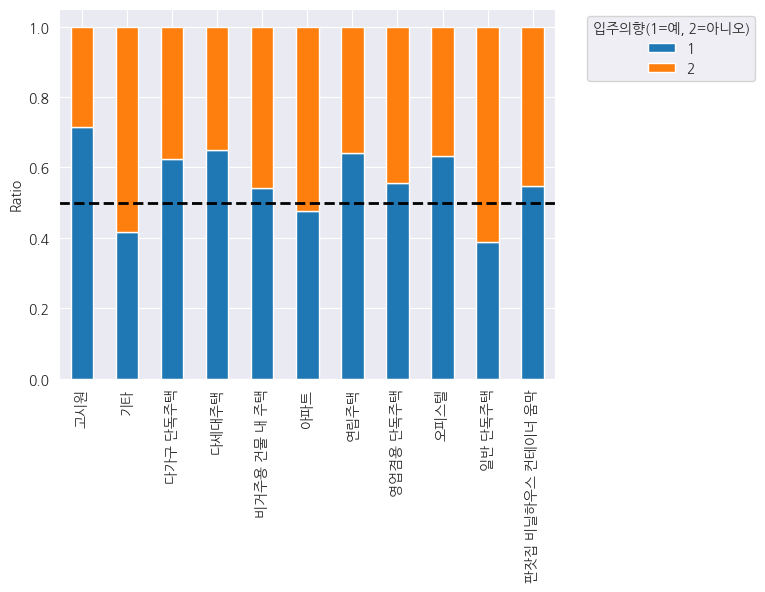

In [48]:
ratio_df = df.groupby('문4. 귀 댁의 주택 유형은 무엇입니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [49]:
df=df.replace({'문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?':1},'지상')
df=df.replace({'문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?':2},'반지하')
df=df.replace({'문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?':3},'지하')
df=df.replace({'문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?':4},'옥상(옥탑)')

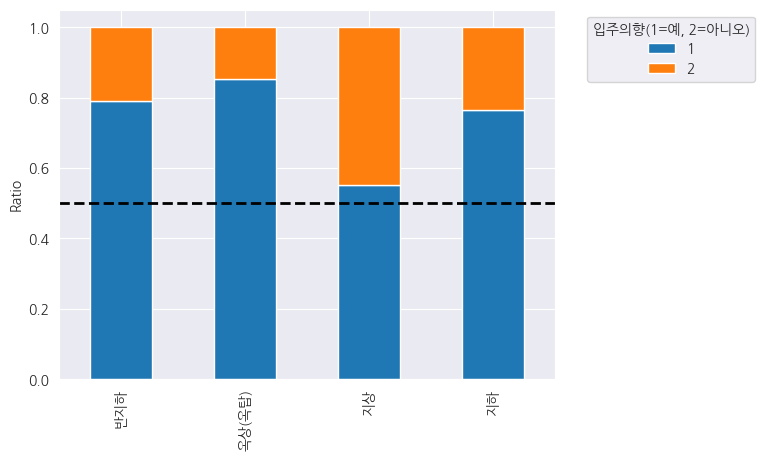

In [50]:
ratio_df = df.groupby('문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [51]:
# 무주택 가구라 현 점유형태 자가 없음
df=df.replace({'문7. 귀 댁의 점유형태는 어디에 해당됩니까?':2},'전세')
df=df.replace({'문7. 귀 댁의 점유형태는 어디에 해당됩니까?':3},'보증금 있는 월세')
df=df.replace({'문7. 귀 댁의 점유형태는 어디에 해당됩니까?':4},'보증금 없는 월세(사글세, 연세, 일세 포함)')
df=df.replace({'문7. 귀 댁의 점유형태는 어디에 해당됩니까?':5},'보증금 없는 월세(사글세, 연세, 일세 포함)')
df=df.replace({'문7. 귀 댁의 점유형태는 어디에 해당됩니까?':6},'보증금 없는 월세(사글세, 연세, 일세 포함)')
df=df.replace({'문7. 귀 댁의 점유형태는 어디에 해당됩니까?':7},'무상')

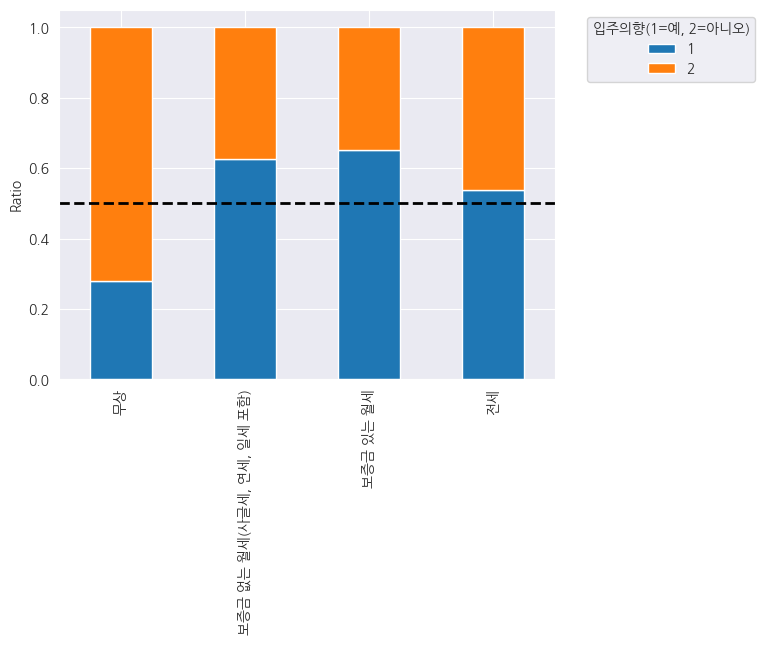

In [52]:
ratio_df = df.groupby('문7. 귀 댁의 점유형태는 어디에 해당됩니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [53]:
df=df.replace({'문20. 귀 댁의 주택 구조는 어떻습니까?':1},'원룸형')
df=df.replace({'문20. 귀 댁의 주택 구조는 어떻습니까?':2},'원룸형 아님')

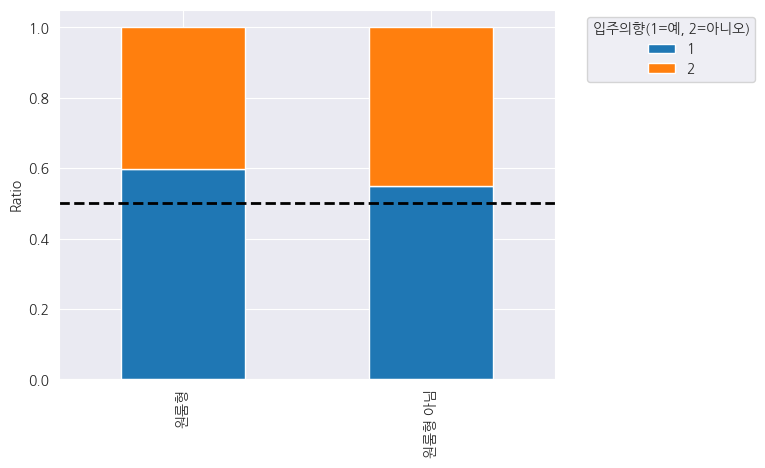

In [54]:
ratio_df = df.groupby('문20. 귀 댁의 주택 구조는 어떻습니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [55]:
df=df.replace({'문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태':4},'매우 만족')

df=df.replace({'문24. 현재주택 주거환경 만족도_13) 대기오염 정도':1},'매우 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_13) 대기오염 정도':2},'약간 불만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_13) 대기오염 정도':3},'대체로 만족')
df=df.replace({'문24. 현재주택 주거환경 만족도_13) 대기오염 정도':4},'매우 만족')

df=df.replace({'문25. 주택에 대한 전반적인 만족도':1},'매우 불만족')
df=df.replace({'문25. 주택에 대한 전반적인 만족도':2},'약간 불만족')
df=df.replace({'문25. 주택에 대한 전반적인 만족도':3},'대체로 만족')
df=df.replace({'문25. 주택에 대한 전반적인 만족도':4},'매우 만족')

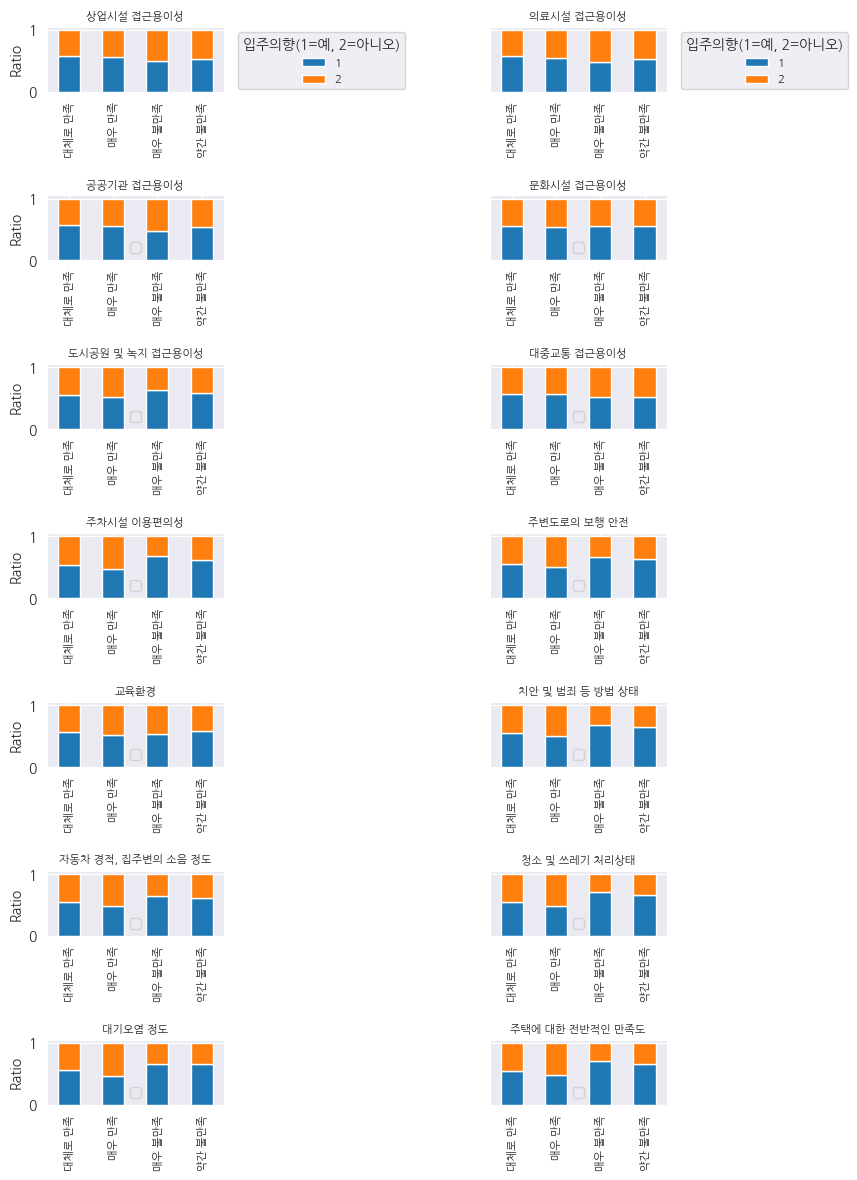

In [56]:
fig, axs = plt.subplots(7, 2, figsize=(8, 14), sharey=True, gridspec_kw={'wspace': 1.5, 'hspace': 1.6})

ratio_df1 = df.groupby('문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df1.plot(kind='bar', stacked=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Ratio')
axs[0, 0].legend(title='입주의향(1=예, 2=아니오)', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[0, 0].set_title('상업시설 접근용이성', fontsize=8)

ratio_df2 = df.groupby('문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df2.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Ratio')
axs[0, 1].legend(title='입주의향(1=예, 2=아니오)', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[0, 1].set_title('의료시설 접근용이성', fontsize=8)

ratio_df3 = df.groupby('문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df3.plot(kind='bar', stacked=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Ratio')
axs[1, 0].legend('')
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[1, 0].set_title('공공기관 접근용이성', fontsize=8)

ratio_df4 = df.groupby('문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df4.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Ratio')
axs[1, 1].legend('')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[1, 1].set_title('문화시설 접근용이성', fontsize=8)

ratio_df5 = df.groupby('문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df5.plot(kind='bar', stacked=True, ax=axs[2, 0])
axs[2, 0].set_xlabel('')
axs[2, 0].set_ylabel('Ratio')
axs[2, 0].legend('')
axs[2, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[2, 0].set_title('도시공원 및 녹지 접근용이성', fontsize=8)

ratio_df6 = df.groupby('문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df6.plot(kind='bar', stacked=True, ax=axs[2, 1])
axs[2, 1].set_xlabel('')
axs[2, 1].set_ylabel('Ratio')
axs[2, 1].legend('')
axs[2, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[2, 1].set_title('대중교통 접근용이성', fontsize=8)

ratio_df7 = df.groupby('문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df7.plot(kind='bar', stacked=True, ax=axs[3, 0])
axs[3, 0].set_xlabel('')
axs[3, 0].set_ylabel('Ratio')
axs[3, 0].legend('')
axs[3, 0].set_xticklabels(axs[3, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[3, 0].set_title('주차시설 이용편의성', fontsize=8)

ratio_df8 = df.groupby('문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df8.plot(kind='bar', stacked=True, ax=axs[3, 1])
axs[3, 1].set_xlabel('')
axs[3, 1].set_ylabel('Ratio')
axs[3, 1].legend('')
axs[3, 1].set_xticklabels(axs[3, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[3, 1].set_title('주변도로의 보행 안전', fontsize=8)

ratio_df9 = df.groupby('문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df9.plot(kind='bar', stacked=True, ax=axs[4, 0])
axs[4, 0].set_xlabel('')
axs[4, 0].set_ylabel('Ratio')
axs[4, 0].legend('')
axs[4, 0].set_xticklabels(axs[4, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[4, 0].set_title('교육환경', fontsize=8)

ratio_df10 = df.groupby('문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df10.plot(kind='bar', stacked=True, ax=axs[4, 1])
axs[4, 1].set_xlabel('')
axs[4, 1].set_ylabel('Ratio')
axs[4, 1].legend('')
axs[4, 1].set_xticklabels(axs[4, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[4, 1].set_title('치안 및 범죄 등 방범 상태', fontsize=8)

ratio_df11 = df.groupby('문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df11.plot(kind='bar', stacked=True, ax=axs[5, 0])
axs[5, 0].set_xlabel('')
axs[5, 0].set_ylabel('Ratio')
axs[5, 0].legend('')
axs[5, 0].set_xticklabels(axs[5, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[5, 0].set_title('자동차 경적, 집주변의 소음 정도', fontsize=8)

ratio_df12 = df.groupby('문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df12.plot(kind='bar', stacked=True, ax=axs[5, 1])
axs[5, 1].set_xlabel('')
axs[5, 1].set_ylabel('Ratio')
axs[5, 1].legend('')
axs[5, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[5, 1].set_title('청소 및 쓰레기 처리상태', fontsize=8)

ratio_df13 = df.groupby('문24. 현재주택 주거환경 만족도_13) 대기오염 정도')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df13.plot(kind='bar', stacked=True, ax=axs[6, 0])
axs[6, 0].set_xlabel('')
axs[6, 0].set_ylabel('Ratio')
axs[6, 0].legend('')
axs[6, 0].set_xticklabels(axs[2, 0].get_xticklabels(), rotation=90, fontsize=8)
axs[6, 0].set_title('대기오염 정도', fontsize=8)

ratio_df14 = df.groupby('문25. 주택에 대한 전반적인 만족도')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df14.plot(kind='bar', stacked=True, ax=axs[6, 1])
axs[6, 1].set_xlabel('')
axs[6, 1].set_ylabel('Ratio')
axs[6, 1].legend('')
axs[6, 1].set_xticklabels(axs[2, 1].get_xticklabels(), rotation=90, fontsize=8)
axs[6, 1].set_title('주택에 대한 전반적인 만족도', fontsize=8)

plt.tight_layout()  
plt.show()

In [57]:
df[['문33-1. 몇 년 안에 이사가실 계획 입니까?']] = df[['문33-1. 몇 년 안에 이사가실 계획 입니까?']].fillna(4)

In [58]:
df=df.replace({'문33-1. 몇 년 안에 이사가실 계획 입니까?':1},'2년 미만')
df=df.replace({'문33-1. 몇 년 안에 이사가실 계획 입니까?':2},'2~5년')
df=df.replace({'문33-1. 몇 년 안에 이사가실 계획 입니까?':3},'5년 초과')
df=df.replace({'문33-1. 몇 년 안에 이사가실 계획 입니까?':4},'이사 계획 없음 및 모름')

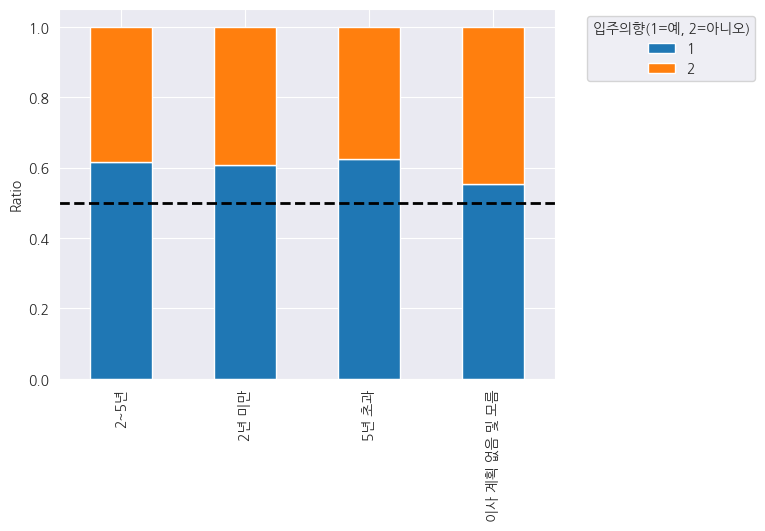

In [59]:
ratio_df = df.groupby('문33-1. 몇 년 안에 이사가실 계획 입니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [60]:
df[['문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.']] = df[['문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.']].fillna(15)

In [61]:
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':1},'결혼이나 세대독립을 위해')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':2},'자가로 이사 또는 자가 마련을 위해')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':3},'높은 집값 혹은 집세 부담')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':4},'집주인이 나가라고 해서')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':5},'계약 만기로 인해')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':6},'재개발이나 재건축으로 인해')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':7},'시설이나 설비가 더 양호한 집으로 이사')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':8},'가구상황에 적합한 주택규모로 이사')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':9},'부모 혹은 자녀 등과 가까이 살기 위해')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':10},'직주근접 혹은 직장변동')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':11},'교통과 편의 및 문화시설 및 공원과 녹지 등이 좋은 지역으로 가기 위해')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':12},'자녀 양육 및 교육환경')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':13},'귀촌 혹은 귀농 등 자연환경이 좋은 지역을 찾아서')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':14},'기타')
df=df.replace({'문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.':15},'이사 계획 없음 및 모름')

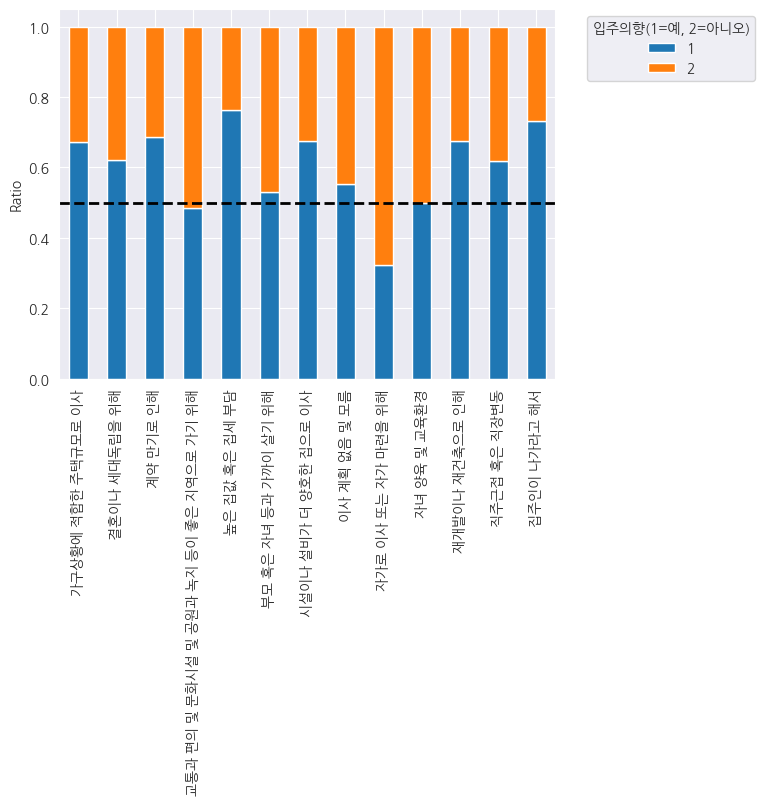

In [62]:
ratio_df = df.groupby('문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [63]:
df[['문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도']] = df[['문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도']].fillna(19)

In [64]:
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':1},'수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':2},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':3},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':4},'수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':5},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':6},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':7},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':8},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':9},'수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':10},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':11},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':12},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':13},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':14},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':15},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':16},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':17},'비수도권')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':18},'국외')
df=df.replace({'문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도':19},'이사 계획 없음 및 모름')

In [65]:
df[['시도2']] = df[['시도']]

df=df.replace({'시도2':'서울특별시'},'수도권')
df=df.replace({'시도2':'부산광역시'},'비수도권')
df=df.replace({'시도2':'대구광역시'},'비수도권')
df=df.replace({'시도2':'인천광역시'},'수도권')
df=df.replace({'시도2':'광주광역시'},'비수도권')
df=df.replace({'시도2':'대전광역시'},'비수도권')
df=df.replace({'시도2':'울산광역시'},'비수도권')
df=df.replace({'시도2':'세종특별자치시'},'비수도권')
df=df.replace({'시도2':'경기도'},'수도권')
df=df.replace({'시도2':'강원도'},'비수도권')
df=df.replace({'시도2':'충청북도'},'비수도권')
df=df.replace({'시도2':'충청남도'},'비수도권')
df=df.replace({'시도2':'전라북도'},'비수도권')
df=df.replace({'시도2':'전라남도'},'비수도권')
df=df.replace({'시도2':'경상북도'},'비수도권')
df=df.replace({'시도2':'경상남도'},'비수도권')
df=df.replace({'시도2':'제주특별자치도'},'비수도권')

In [66]:
df['시도2'].value_counts()

시도2
비수도권    26926
수도권     18139
Name: count, dtype: int64

In [67]:
df['이사 계획_거주지'] = df['시도2'] + ' to ' + df['문35. 귀 댁은 앞으로 어느 지역으로 이사할 계획입니까?_시도']

In [68]:
df['이사 계획_거주지'].value_counts()

이사 계획_거주지
비수도권 to 이사 계획 없음 및 모름    24280
수도권 to 이사 계획 없음 및 모름     15421
수도권 to 수도권                2677
비수도권 to 비수도권              2524
비수도권 to 수도권                115
수도권 to 비수도권                 37
비수도권 to 국외                   7
수도권 to 국외                    4
Name: count, dtype: int64

In [69]:
df=df.replace({'이사 계획_거주지':'비수도권 to 국외'},'국내 to 국외')
df=df.replace({'이사 계획_거주지':'수도권 to 국외'},'국내 to 국외')

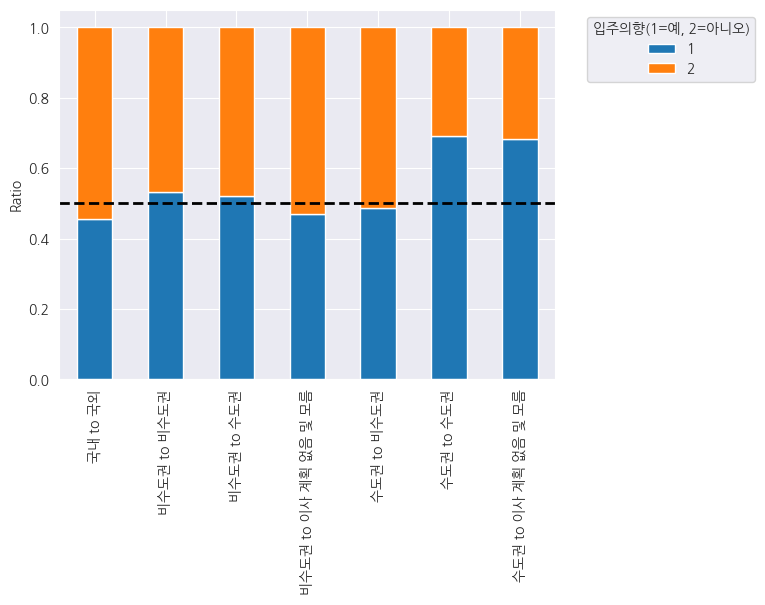

In [70]:
ratio_df = df.groupby('이사 계획_거주지')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [71]:
df[['주택 유형2']] = df[['문4. 귀 댁의 주택 유형은 무엇입니까?']]
# 주택유형 '등기부등본 표제부' 기준 분류
# 오피스텔, 고시원은 준주택
df=df.replace({'주택 유형2':'일반 단독주택'},'단독주택')
df=df.replace({'주택 유형2':'다가구 단독주택'},'단독주택')
df=df.replace({'주택 유형2':'영업겸용 단독주택'},'단독주택')
df=df.replace({'주택 유형2':'아파트'},'공동주택')
df=df.replace({'주택 유형2':'연립주택'},'공동주택')
df=df.replace({'주택 유형2':'다세대주택'},'공동주택')
df=df.replace({'주택 유형2':'비거주용 건물 내 주택'},'기타')
df=df.replace({'주택 유형2':'오피스텔'},'준주택')
df=df.replace({'주택 유형2':'고시원'},'준주택')
df=df.replace({'주택 유형2':'판잣집 비닐하우스 컨테이너 움막'},'기타')
df=df.replace({'주택 유형2':'기타'},'기타')

In [72]:
df['문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?'] = df['문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?'].fillna(12)

In [73]:
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':1},'단독주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':2},'단독주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':3},'단독주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':4},'공동주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':5},'공동주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':6},'공동주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':7},'기타')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':8},'준주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':9},'준주택')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':10},'기타')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':11},'기타')
df=df.replace({'문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?':12},'이사 계획 없음 및 모름')

In [74]:
df['이사 계획_주택 유형'] = df['주택 유형2'] + ' to ' + df['문36. 귀 댁은 어떤 유형의 주택으로 이사하고자 하십니까?']

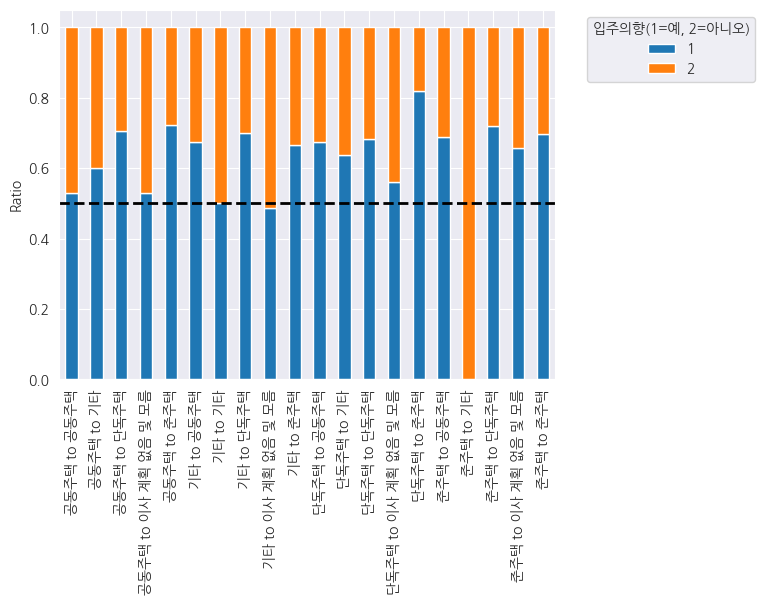

In [75]:
ratio_df = df.groupby('이사 계획_주택 유형')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [76]:
df['문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?'] = df['문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?'].fillna(9)

In [77]:
df=df.replace({'문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?':1},'자가')
df=df.replace({'문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?':2},'전세')
df=df.replace({'문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?':3},'보증금 있는 월세')
df=df.replace({'문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?':4},'보증금 없는 월세(사글세, 연세, 일세 포함)')
df=df.replace({'문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?':5},'무상이나 기타')
df=df.replace({'문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?':9},'이사 계획 없음 및 모름')

In [78]:
df['이사 계획_점유 형태'] = df['문7. 귀 댁의 점유형태는 어디에 해당됩니까?'] + ' to ' + df['문37. 귀 댁은 자가로 이사 하실 계획이십니까, 아니면 전세나 월세로 이사하실 계획이십니까?']

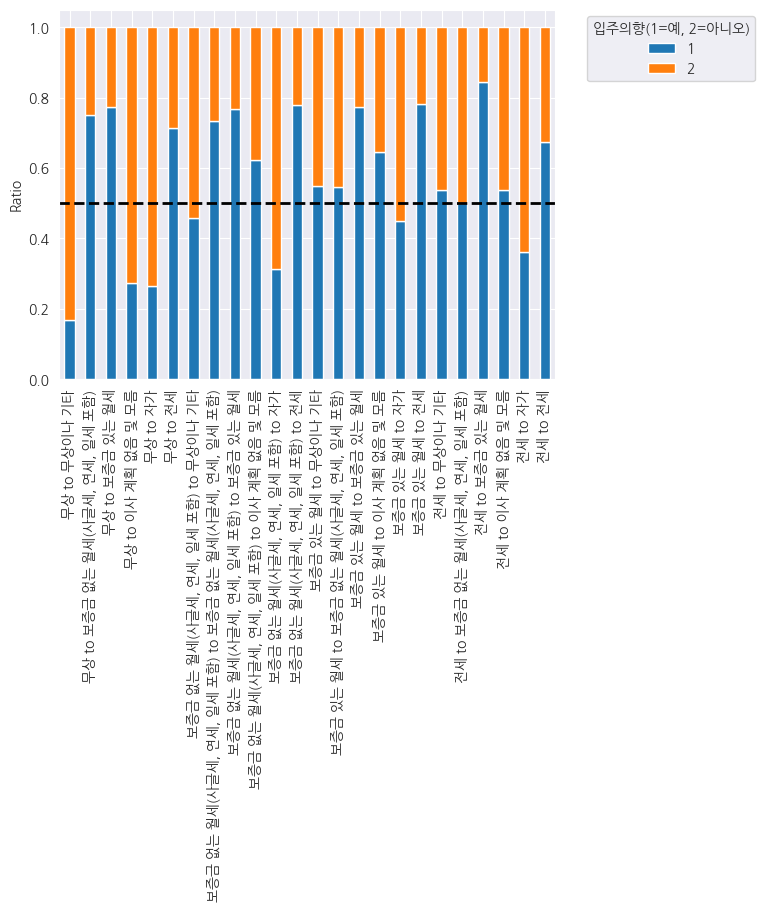

In [79]:
ratio_df = df.groupby('이사 계획_점유 형태')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [80]:
df=df.replace({'문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?':1},'예')
df=df.replace({'문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?':2},'아니오')

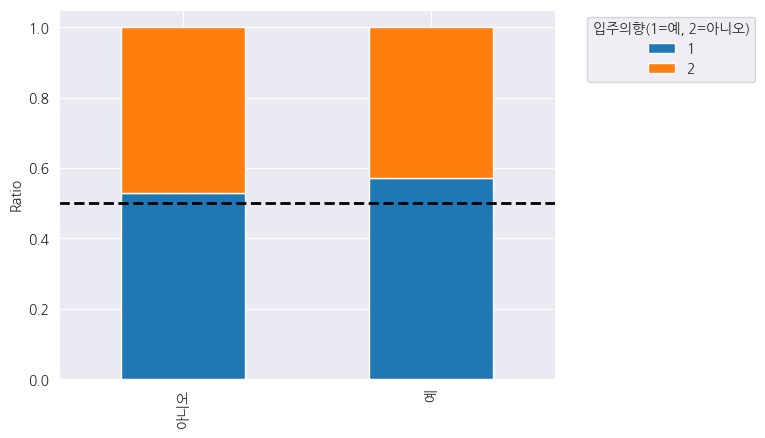

In [81]:
ratio_df = df.groupby('문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [85]:
df['문39. 귀 댁의 현재 상황을 고려할 때, 아래의 주거지원 프로그램이 필요하다고 생각하십니까?'].value_counts()
# 1 필요하다 , 2 필요하지 않다

문39. 귀 댁의 현재 상황을 고려할 때, 아래의 주거지원 프로그램이 필요하다고 생각하십니까?
1    24831
2    20234
Name: count, dtype: int64

In [83]:
df['문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위'] = df['문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위'].fillna(0)

In [84]:
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':1},'월세보조금 지원')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':2},'전세자금 대출 지원')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':3},'주택 구입자금 대출 지원')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':4},'주택개량 및 개보수 지원')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':5},'임대 후 분양전환 공공임대주택 공급')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':6},'장기공공임대주택 공급')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':7},'공공분양주택공급')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':8},'주거상담과 정보제공 등')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':9},'기타')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':10},'없음')
df=df.replace({'문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위':0},'없음')

In [85]:
# 없음은 주거지원 프로그램이 필요하지 않은 경우
df['문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위'].value_counts()

문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위
없음                     20234
전세자금 대출 지원              7807
주택 구입자금 대출 지원           4965
장기공공임대주택 공급             4100
월세보조금 지원                3980
임대 후 분양전환 공공임대주택 공급     1881
공공분양주택공급                1184
주택개량 및 개보수 지원            541
주거상담과 정보제공 등             373
Name: count, dtype: int64

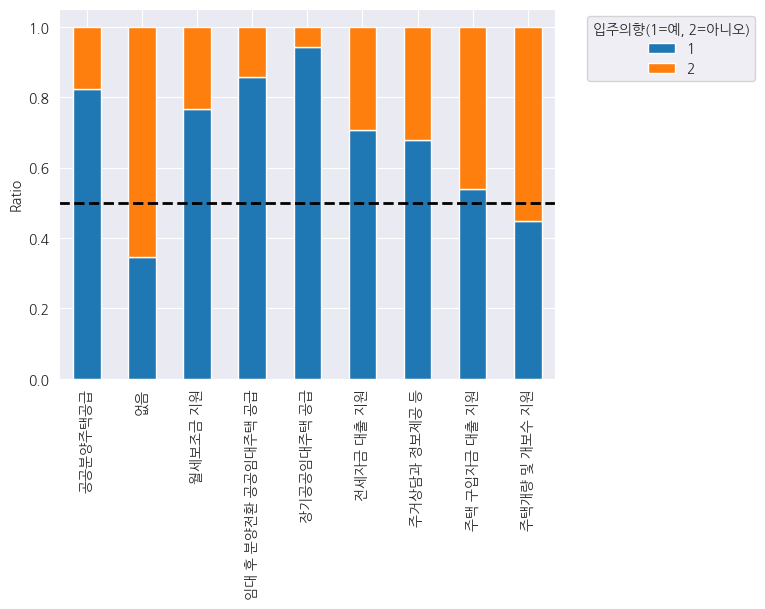

In [86]:
ratio_df = df.groupby('문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [87]:
df=df.replace({'가구 구성원 No.1_성별':1},'남')
df=df.replace({'가구 구성원 No.1_성별':2},'여')

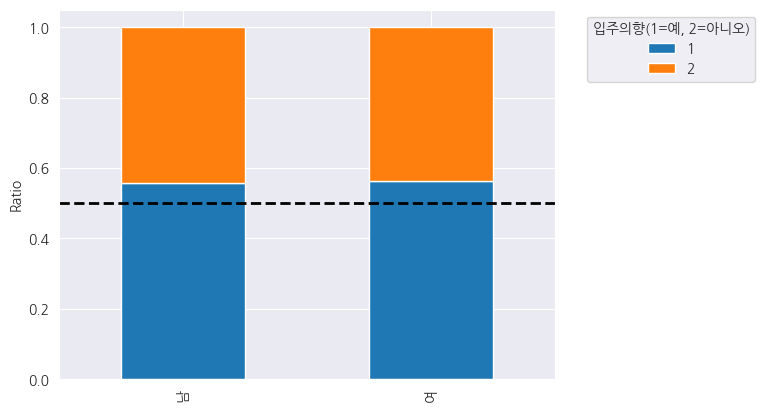

In [88]:
ratio_df = df.groupby('가구 구성원 No.1_성별')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [89]:
df=df.replace({'가구 구성원 No.1_주민등록상 등재여부':1},'등재')
df=df.replace({'가구 구성원 No.1_주민등록상 등재여부':2},'비등재')

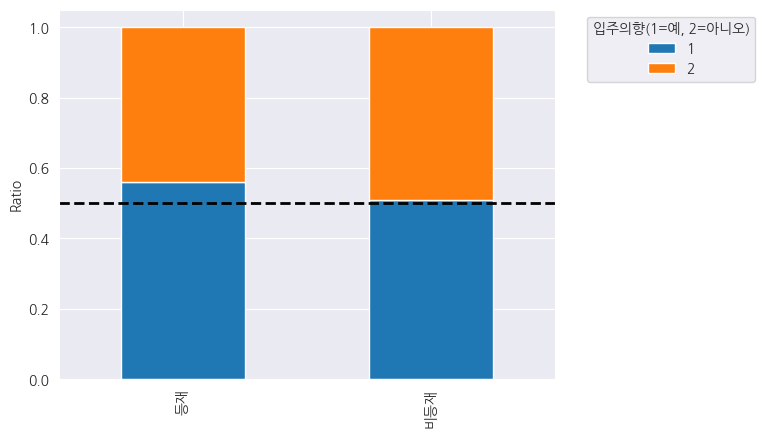

In [90]:
ratio_df = df.groupby('가구 구성원 No.1_주민등록상 등재여부')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [91]:
df=df.replace({'가구 구성원 No.1_실제 동거여부':1},'동거')
df=df.replace({'가구 구성원 No.1_실제 동거여부':2},'비동거')

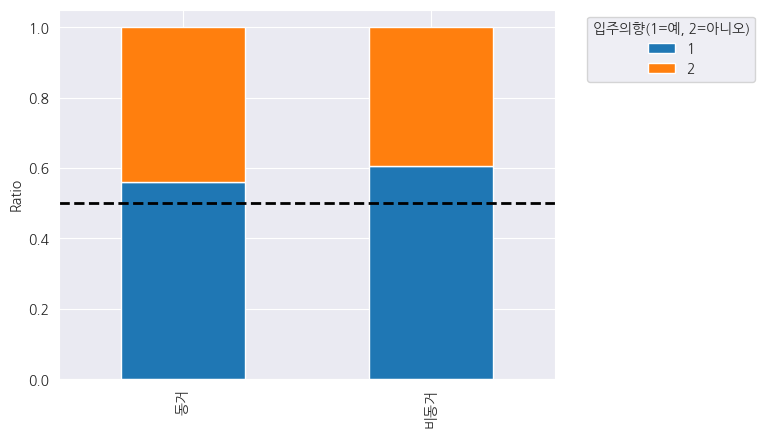

In [92]:
ratio_df = df.groupby('가구 구성원 No.1_실제 동거여부')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [93]:
df=df.replace({'가구 구성원 No.1_장애여부':1},'해당')
df=df.replace({'가구 구성원 No.1_장애여부':2},'해당')
df=df.replace({'가구 구성원 No.1_장애여부':3},'해당')
df=df.replace({'가구 구성원 No.1_장애여부':4},'해당없음')

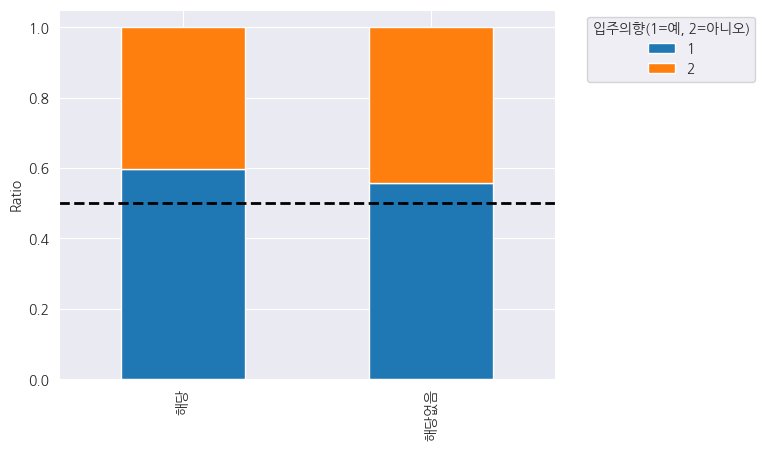

In [94]:
ratio_df = df.groupby('가구 구성원 No.1_장애여부')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [95]:
df=df.replace({'문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?':1},'예')
df=df.replace({'문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?':2},'아니오')

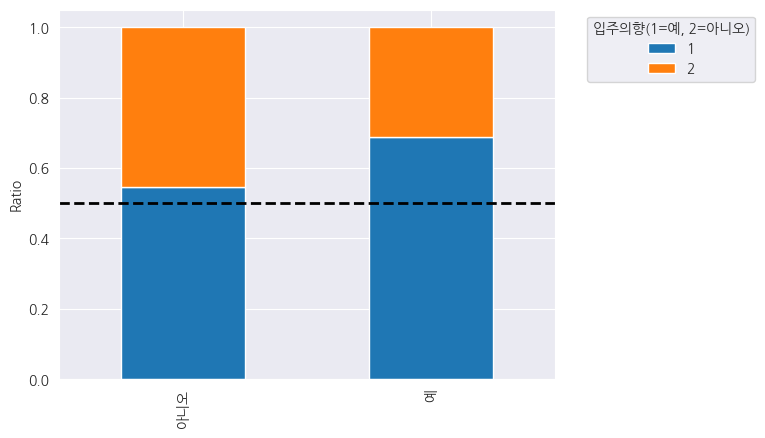

In [96]:
ratio_df = df.groupby('문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

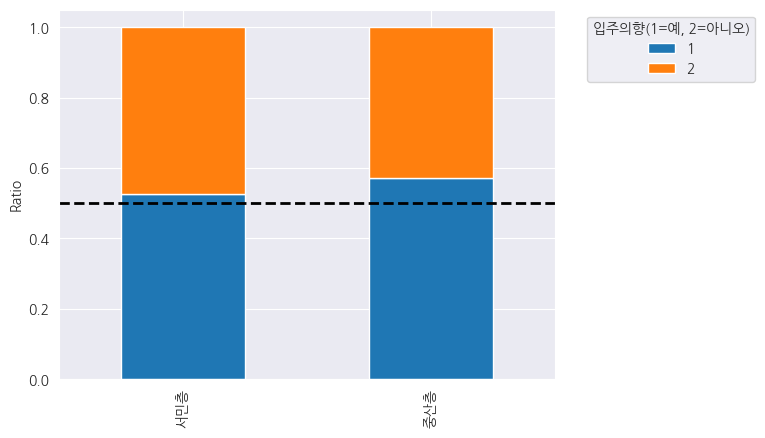

In [97]:
ratio_df = df.groupby('소득계층')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [98]:
# 필수, 선택1, 선택2
df=df.replace({'배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.':1},'중학교 졸업 이하')
df=df.replace({'배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.':2},'중학교 졸업 이하')
df=df.replace({'배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.':3},'고등학교 졸업')
df=df.replace({'배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.':4},'대학 졸업 이상')
df=df.replace({'배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.':5},'대학 졸업 이상')

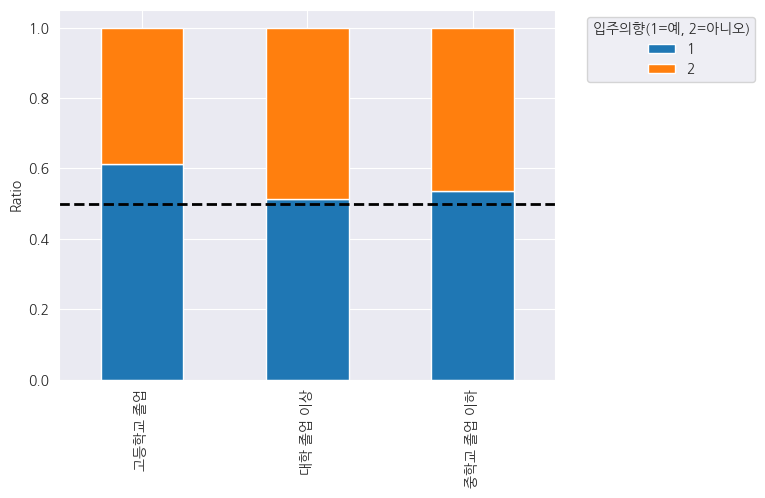

In [99]:
ratio_df = df.groupby('배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [100]:
df['배문2-2. 다음 중 어떤 근무형태에 해당하십니까?'].value_counts()

배문2-2. 다음 중 어떤 근무형태에 해당하십니까?
1.00000    17311
2.00000     8894
4.00000     4316
3.00000      838
5.00000       48
Name: count, dtype: int64

In [101]:
df['배문2-2. 다음 중 어떤 근무형태에 해당하십니까?'] = df['배문2-2. 다음 중 어떤 근무형태에 해당하십니까?'].fillna(9)

In [102]:
df=df.replace({'배문2-2. 다음 중 어떤 근무형태에 해당하십니까?':1},'상용근로자')
df=df.replace({'배문2-2. 다음 중 어떤 근무형태에 해당하십니까?':2},'임시일용근로자')
df=df.replace({'배문2-2. 다음 중 어떤 근무형태에 해당하십니까?':3},'사업자 및 자영자')
df=df.replace({'배문2-2. 다음 중 어떤 근무형태에 해당하십니까?':4},'사업자 및 자영자')
df=df.replace({'배문2-2. 다음 중 어떤 근무형태에 해당하십니까?':5},'무급가족종사자')
df=df.replace({'배문2-2. 다음 중 어떤 근무형태에 해당하십니까?':9},'무직 및 기타')

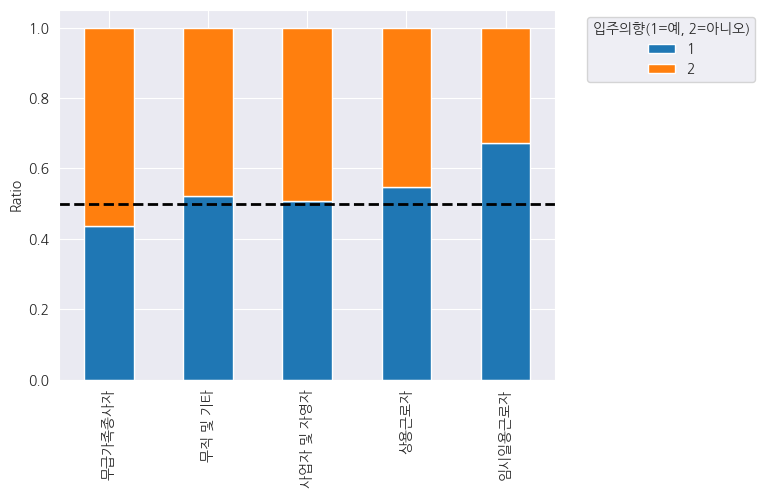

In [103]:
ratio_df = df.groupby('배문2-2. 다음 중 어떤 근무형태에 해당하십니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [104]:
df['배문2-3. 귀하의 현재 고용형태는 무엇입니까?'].isnull().sum()

18860

In [105]:
df=df.replace({'문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오.':1},'예')
df=df.replace({'문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오.':2},'아니오')
df['문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오.'].value_counts()

문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오.
예      4868
아니오    2422
Name: count, dtype: int64

In [106]:
## 신혼가구 추가
df['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?'] = df['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?'].fillna(0)
df=df.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':0},'계획 없음')
df=df.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':1},'1년 미만')
df=df.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':2},'1~3년')
df=df.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':3},'3~5년')
df=df.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':4},'5~10년')
df=df.replace({'문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?':5},'10년 이상')

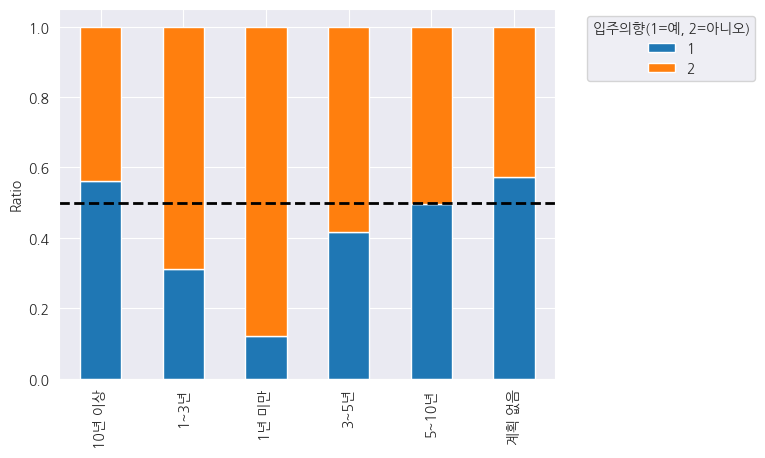

In [107]:
ratio_df = df.groupby('문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [108]:
df['문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오.'].value_counts()

문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오.
예      4868
아니오    2422
Name: count, dtype: int64

In [109]:
# 문3. 귀 가구는 향후 남편 또는 아내의 부모님과 동거하실 계획이 있으십니까?
df['문3. 귀 가구는 향후 남편 또는 아내의 부모님과 동거하실 계획이 있으십니까?'].value_counts(), df['문3-1. 그 이유는 무엇입니까?'].value_counts()

(문3. 귀 가구는 향후 남편 또는 아내의 부모님과 동거하실 계획이 있으십니까?
 2.00000    6584
 1.00000     706
 Name: count, dtype: int64,
 문3-1. 그 이유는 무엇입니까?
 3.00000    405
 2.00000    201
 1.00000     97
 4.00000      3
 Name: count, dtype: int64)

In [110]:
df['문3-1. 그 이유는 무엇입니까?'] = df['문3-1. 그 이유는 무엇입니까?'].fillna(0)

In [111]:
df=df.replace({'문3-1. 그 이유는 무엇입니까?':0},'아니오')
df=df.replace({'문3-1. 그 이유는 무엇입니까?':1},'비용(주거비 혹은 생활비 등) 절감을 위해')
df=df.replace({'문3-1. 그 이유는 무엇입니까?':2},'육아 혹은 보육에 도움을 받기 위해')
df=df.replace({'문3-1. 그 이유는 무엇입니까?':3},'부모님을 부양하기 위해')
df=df.replace({'문3-1. 그 이유는 무엇입니까?':4},'기타')

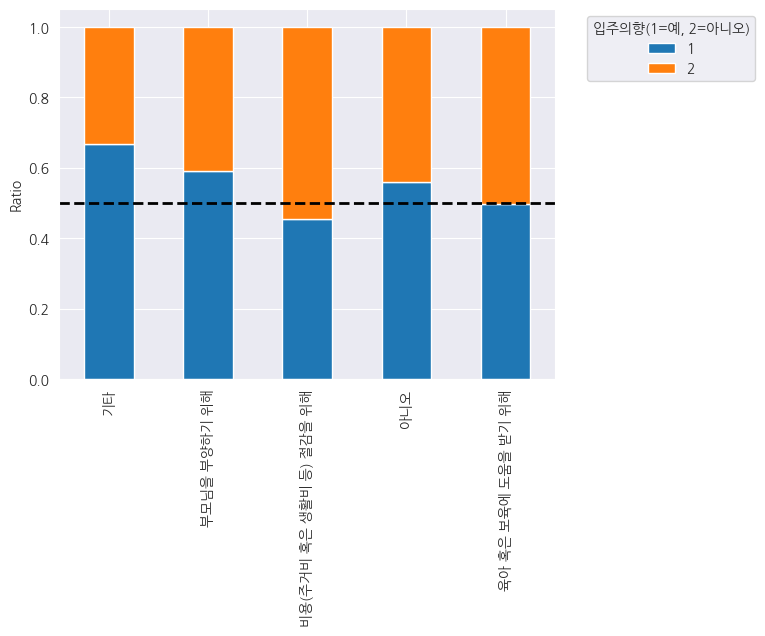

In [112]:
ratio_df = df.groupby('문3-1. 그 이유는 무엇입니까?')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [114]:
## 7 == 없음
df['문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위'] = df['문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위'].fillna(7)

In [115]:
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':1},'주택마련/주거비/주택규모 등의 주거문제')
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':2},'가계경제 및 고용상태')
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':3},'자녀 양육비용 및 교육비용')
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':4},'일/가정 양립 가능성')
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':5},'가족가치관 및 라이프스타일')
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':6},'기타')
df=df.replace({'문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위':7},'없음')

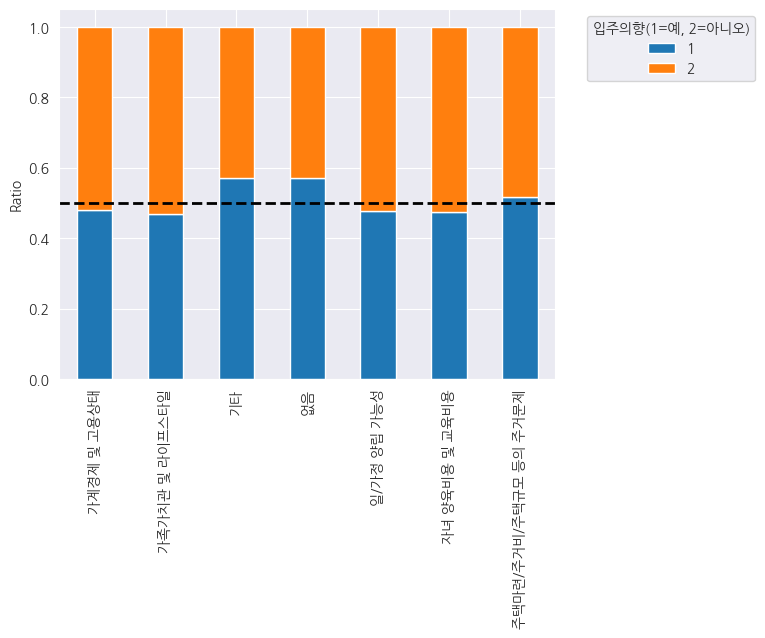

In [116]:
ratio_df = df.groupby('문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위')['문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'].value_counts(normalize=True).unstack()
ratio_df.plot(kind='bar', stacked=True)
plt.axhline(y=0.5, color='black', linestyle='--', linewidth=2)
plt.xlabel('')
plt.ylabel('Ratio')
plt.legend(title='입주의향(1=예, 2=아니오)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

#### 재분류

In [117]:
df_2021 = df[df['year'] == 2021]
df_2020 = df[df['year'] == 2020]
df_2019 = df[df['year'] == 2019]
df_2018 = df[df['year'] == 2018]

In [118]:
df_2021 =df_2021.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':1},'그렇다')
df_2021 =df_2021.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':2},'아니다')

df_2020 =df_2020.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':1},'그렇다')
df_2020 =df_2020.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':2},'아니다')

df_2019 =df_2019.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':1},'그렇다')
df_2019 =df_2019.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':2},'아니다')

df_2018 =df_2018.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':1},'그렇다')
df_2018 =df_2018.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':2},'아니다')

In [119]:
df_2021 =df_2021.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'그렇다'},1)
df_2021 =df_2021.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'아니다'},0)

df_2020 =df_2020.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'그렇다'},1)
df_2020 =df_2020.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'아니다'},0)

df_2019 =df_2019.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'그렇다'},1)
df_2019 =df_2019.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'아니다'},0)

df_2018 =df_2018.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'그렇다'},1)
df_2018 =df_2018.replace({'문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?':'아니다'},0)

### 청년가구 - 2021년 기준

In [120]:
df_2021_청년가구 = df_2021[df_2021['가구 구성원 No.1_우리나라나이'] <= 39]
df_2020_청년가구 = df_2020[df_2020['가구 구성원 No.1_우리나라나이'] <= 39]
df_2019_청년가구 = df_2019[df_2019['가구 구성원 No.1_우리나라나이'] <= 39]
df_2018_청년가구 = df_2018[df_2018['가구 구성원 No.1_우리나라나이'] <= 39]

In [121]:
df_2021_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']=df_2021_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'].fillna(3)
df_2020_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']=df_2020_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'].fillna(3)
df_2019_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']=df_2019_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'].fillna(3)
df_2018_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']=df_2018_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'].fillna(3)

In [122]:
# 청년가구는 결혼 x
df_2021_청년가구 = df_2021_청년가구[df_2021_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'] == 3.0]
df_2020_청년가구 = df_2020_청년가구[df_2020_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'] == 3.0]
df_2019_청년가구 = df_2019_청년가구[df_2019_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'] == 3.0]
df_2018_청년가구 = df_2018_청년가구[df_2018_청년가구['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?'] == 3.0]

In [123]:
df_2021_청년가구.shape, df_2020_청년가구.shape, df_2019_청년가구.shape, df_2018_청년가구.shape

((1743, 347), (2026, 347), (2532, 347), (2143, 347))

### 신혼가구 - 2021년 기준

In [124]:
df_2021_신혼가구 = df_2021[df_2021['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']==1]
df_2020_신혼가구 = df_2020[df_2020['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']==1]
df_2019_신혼가구 = df_2019[df_2019['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']==1]
df_2018_신혼가구 = df_2018[df_2018['문47. 귀하께서는 결혼하신지 얼마나 되셨습니까?']==1]

In [125]:
# 결혼 기간 0년 ~ 7년
df_2021_신혼가구 = df_2021_신혼가구[df_2021_신혼가구['문47-1. 결혼하신 연도를 선택해주십시오.'] <= 8.0]
df_2020_신혼가구 = df_2020_신혼가구[df_2020_신혼가구['문47-1. 결혼하신 연도를 선택해주십시오.'] <= 8.0]
df_2019_신혼가구 = df_2019_신혼가구[df_2019_신혼가구['문47-1. 결혼하신 연도를 선택해주십시오.'] <= 8.0]
df_2018_신혼가구 = df_2018_신혼가구[df_2018_신혼가구['문47-1. 결혼하신 연도를 선택해주십시오.'] <= 8.0]

In [126]:
df_2021_신혼가구.shape, df_2020_신혼가구.shape, df_2019_신혼가구.shape, df_2018_신혼가구.shape

((1218, 347), (1258, 347), (1876, 347), (1767, 347))

In [127]:
df_2019_신혼가구[['가구 구성원 No.1_우리나라나이','문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위','(M)2 문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._2순위']]

,가구 구성원 No.1_우리나라나이,문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위,(M)2 문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._2순위
21486,61,없음,NaN
21522,45,일/가정 양립 가능성,3.00000
21541,41,주택마련/주거비/주택규모 등의 주거문제,3.00000
21577,40,가계경제 및 고용상태,5.00000
21634,42,일/가정 양립 가능성,3.00000
...,...,...,...
34198,44,가계경제 및 고용상태,3.00000
34199,36,가계경제 및 고용상태,1.00000
34204,29,주택마련/주거비/주택규모 등의 주거문제,2.00000
34223,39,가족가치관 및 라이프스타일,4.00000


### 고령 가구 - 2021년 기준

In [128]:
df_2021_고령가구 = df_2021[df_2021['가구 구성원 No.1_우리나라나이']>=65]
df_2020_고령가구 = df_2020[df_2020['가구 구성원 No.1_우리나라나이']>=65]
df_2019_고령가구 = df_2019[df_2019['가구 구성원 No.1_우리나라나이']>=65]
df_2018_고령가구 = df_2018[df_2018['가구 구성원 No.1_우리나라나이']>=65]

In [129]:
# 두 데이터프레임의 인덱스 번호 비교
indices_고령가구 = df_2021_고령가구.index
indices_청년가구 = df_2021_청년가구.index
indices_신혼가구 = df_2021_신혼가구.index

# 겹치는 인덱스 찾기
overlapping_indices_고령청년 = indices_고령가구.intersection(indices_청년가구)
overlapping_indices_고령신혼 = indices_고령가구.intersection(indices_신혼가구)
overlapping_indices_청년신혼 = indices_청년가구.intersection(indices_신혼가구)

# 겹치는 인덱스 출력
if not overlapping_indices_고령청년.empty:
    print("고령가구와 청년가구의 겹치는 인덱스:", overlapping_indices_고령청년)

if not overlapping_indices_고령신혼.empty:
    print("고령가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_고령신혼)

if not overlapping_indices_청년신혼.empty:
    print("청년가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_청년신혼)

In [130]:
# 두 데이터프레임의 인덱스 번호 비교
indices_고령가구 = df_2020_고령가구.index
indices_청년가구 = df_2020_청년가구.index
indices_신혼가구 = df_2020_신혼가구.index

# 겹치는 인덱스 찾기
overlapping_indices_고령청년 = indices_고령가구.intersection(indices_청년가구)
overlapping_indices_고령신혼 = indices_고령가구.intersection(indices_신혼가구)
overlapping_indices_청년신혼 = indices_청년가구.intersection(indices_신혼가구)

# 겹치는 인덱스 출력
if not overlapping_indices_고령청년.empty:
    print("고령가구와 청년가구의 겹치는 인덱스:", overlapping_indices_고령청년)

if not overlapping_indices_고령신혼.empty:
    print("고령가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_고령신혼)

if not overlapping_indices_청년신혼.empty:
    print("청년가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_청년신혼)

고령가구와 신혼가구의 겹치는 인덱스: Index([16795, 17179, 20075], dtype='int64')


In [131]:
# 두 데이터프레임의 인덱스 번호 비교
indices_고령가구 = df_2019_고령가구.index
indices_청년가구 = df_2019_청년가구.index
indices_신혼가구 = df_2019_신혼가구.index

# 겹치는 인덱스 찾기
overlapping_indices_고령청년 = indices_고령가구.intersection(indices_청년가구)
overlapping_indices_고령신혼 = indices_고령가구.intersection(indices_신혼가구)
overlapping_indices_청년신혼 = indices_청년가구.intersection(indices_신혼가구)

# 겹치는 인덱스 출력
if not overlapping_indices_고령청년.empty:
    print("고령가구와 청년가구의 겹치는 인덱스:", overlapping_indices_고령청년)

if not overlapping_indices_고령신혼.empty:
    print("고령가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_고령신혼)

if not overlapping_indices_청년신혼.empty:
    print("청년가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_청년신혼)

고령가구와 신혼가구의 겹치는 인덱스: Index([23825, 24342, 29497, 29690], dtype='int64')


In [132]:
# 두 데이터프레임의 인덱스 번호 비교
indices_고령가구 = df_2018_고령가구.index
indices_청년가구 = df_2018_청년가구.index
indices_신혼가구 = df_2018_신혼가구.index

# 겹치는 인덱스 찾기
overlapping_indices_고령청년 = indices_고령가구.intersection(indices_청년가구)
overlapping_indices_고령신혼 = indices_고령가구.intersection(indices_신혼가구)
overlapping_indices_청년신혼 = indices_청년가구.intersection(indices_신혼가구)

# 겹치는 인덱스 출력
if not overlapping_indices_고령청년.empty:
    print("고령가구와 청년가구의 겹치는 인덱스:", overlapping_indices_고령청년)

if not overlapping_indices_고령신혼.empty:
    print("고령가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_고령신혼)

if not overlapping_indices_청년신혼.empty:
    print("청년가구와 신혼가구의 겹치는 인덱스:", overlapping_indices_청년신혼)

고령가구와 신혼가구의 겹치는 인덱스: Index([40387, 42479, 44343, 45681], dtype='int64')


### 중장년 가구 - 2021년 기준

In [133]:
# 겹치지 않는 인덱스 찾기
고령_2021 = df_2021.index.difference(df_2021_고령가구.index)
청년_2021 = df_2021.index.difference(df_2021_청년가구.index)
신혼_2021 = df_2021.index.difference(df_2021_신혼가구.index)

# 겹치지 않는 인덱스만 가지는 데이터프레임 생성
df_2021_중장년가구 = df_2021.loc[고령_2021.intersection(청년_2021).intersection(신혼_2021)]

고령_2020 = df_2020.index.difference(df_2020_고령가구.index)
청년_2020 = df_2020.index.difference(df_2020_청년가구.index)
신혼_2020 = df_2020.index.difference(df_2020_신혼가구.index)

df_2020_중장년가구 = df_2020.loc[고령_2020.intersection(청년_2020).intersection(신혼_2020)]


고령_2019 = df_2019.index.difference(df_2019_고령가구.index)
청년_2019 = df_2019.index.difference(df_2019_청년가구.index)
신혼_2019 = df_2019.index.difference(df_2019_신혼가구.index)

df_2019_중장년가구 = df_2019.loc[고령_2019.intersection(청년_2019).intersection(신혼_2019)]

고령_2018 = df_2018.index.difference(df_2018_고령가구.index)
청년_2018 = df_2018.index.difference(df_2018_청년가구.index)
신혼_2018 = df_2018.index.difference(df_2018_신혼가구.index)

df_2018_중장년가구 = df_2018.loc[고령_2018.intersection(청년_2018).intersection(신혼_2018)]

In [134]:
# 각 데이터프레임의 컬럼명 추출
columns_df1 = set(df_2021_청년가구.columns)
columns_df2 = set(df_2020_청년가구.columns)
columns_df3 = set(df_2019_청년가구.columns)
columns_df4 = set(df_2018_청년가구.columns)

common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

df1_common = df_2021_청년가구[list(common_columns)]
df2_common = df_2020_청년가구[list(common_columns)]
df3_common = df_2019_청년가구[list(common_columns)]
df4_common = df_2018_청년가구[list(common_columns)]

청년가구 = pd.concat([df1_common, df2_common, df3_common, df4_common])

In [135]:
# 각 데이터프레임의 컬럼명 추출
columns_df1 = set(df_2021_신혼가구.columns)
columns_df2 = set(df_2020_신혼가구.columns)
columns_df3 = set(df_2019_신혼가구.columns)
columns_df4 = set(df_2018_신혼가구.columns)

common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

df1_common = df_2021_신혼가구[list(common_columns)]
df2_common = df_2020_신혼가구[list(common_columns)]
df3_common = df_2019_신혼가구[list(common_columns)]
df4_common = df_2018_신혼가구[list(common_columns)]

신혼가구 = pd.concat([df1_common, df2_common, df3_common, df4_common])

In [136]:
# 각 데이터프레임의 컬럼명 추출
columns_df1 = set(df_2021_중장년가구.columns)
columns_df2 = set(df_2020_중장년가구.columns)
columns_df3 = set(df_2019_중장년가구.columns)
columns_df4 = set(df_2018_중장년가구.columns)

common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

df1_common = df_2021_중장년가구[list(common_columns)]
df2_common = df_2020_중장년가구[list(common_columns)]
df3_common = df_2019_중장년가구[list(common_columns)]
df4_common = df_2018_중장년가구[list(common_columns)]

중장년가구 = pd.concat([df1_common, df2_common, df3_common, df4_common])

In [137]:
# 각 데이터프레임의 컬럼명 추출
columns_df1 = set(df_2021_고령가구.columns)
columns_df2 = set(df_2020_고령가구.columns)
columns_df3 = set(df_2019_고령가구.columns)
columns_df4 = set(df_2018_고령가구.columns)

common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

df1_common = df_2021_고령가구[list(common_columns)]
df2_common = df_2020_고령가구[list(common_columns)]
df3_common = df_2019_고령가구[list(common_columns)]
df4_common = df_2018_고령가구[list(common_columns)]

고령가구 = pd.concat([df1_common, df2_common, df3_common, df4_common])

In [138]:
same_index = 신혼가구.index.intersection(고령가구.index)
count_same_index = len(same_index)
count_same_index

11

In [139]:
신혼가구 = 신혼가구.reset_index(drop=True)
청년가구 = 청년가구.reset_index(drop=True)
중장년가구 = 중장년가구.reset_index(drop=True)
고령가구 = 고령가구.reset_index(drop=True)

In [140]:
청년가구.shape, 신혼가구.shape, 중장년가구.shape, 고령가구.shape

((8444, 347), (6119, 347), (19949, 347), (10564, 347))

In [141]:
df.shape

(45065, 347)

In [142]:
columns = [
    '시도', '문4. 귀 댁의 주택 유형은 무엇입니까?', '문6. 귀 댁의 주택 내 위치는 어디에 해당됩니까?',
    '현주택 거주기간(총 개월)', '문9-1. 가구주가 된 이후 무주택 기간은 얼마나 되십니까?_총 개월',
    '문7. 귀 댁의 점유형태는 어디에 해당됩니까?', '문20. 귀 댁의 주택 구조는 어떻습니까?',
    '문21. 귀 댁이 거주하시는 곳의 주택면적은 얼마입니까?_1)주택사용면적(전용면적)_㎡',
    '문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)',
    '문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)',
    '문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)',
    '문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)',
    '문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)',
    '문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)',
    '문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성',
    '문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전',
    '문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)',
    '문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태',
    '문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도',
    '문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태',
    '문24. 현재주택 주거환경 만족도_13) 대기오염 정도',
    '문25. 주택에 대한 전반적인 만족도',
    '문26-1. 귀 댁의 가구주께서 가구주가 된 이후를 기준으로 했을 때, 현재주택에 거주하기까지 몇 번 이사를 하셨습니까?_회',
    '문33-1. 몇 년 안에 이사가실 계획 입니까?',
    '문34-2. 귀 댁이 앞으로 이사를 계획하고 있는 이유를 보기에서 각 두 개씩 골라 기입해 주십시오.',
    '이사 계획_거주지','이사 계획_주택 유형','이사 계획_점유 형태',
    '문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?',
    '문39-1. 귀 댁에 가장 필요한 주거지원 프로그램을 순서대로 두 가지를 골라 주십시오._1순위',
    '가구 구성원 No.1_우리나라나이', '가구 구성원 No.1_성별', '가구 구성원 No.1_주민등록상 등재여부', 
    '가구 구성원 No.1_실제 동거여부', '가구 구성원 No.1_장애여부',
    '문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.',
    '문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?', '소득계층',
    '소득 대비 주택 임대료 비율',
    '총 소득 대비 근로 및 사업소득의 비중',
    '총 소득 대비 재산소득의 비중',
    '총 소득 대비 사회보험 수혜금의 비중',
    '총 소득 대비 정부 보조금의 비중',
    '총 소득 대비 사적이전소득의 비중',
    '총 소득 대비 생활비의 비중',
    '총 소득 대비 월평균 주거관리비의 비중',
    '총 자산 대비 부동산 자산의 비중',
    '총 자산 대비 금융자산의 비중',
    '총 자산 대비 기타자산의 비중',
    '총 부채 대비 금융기관 대출금의 비중',
    '총 부채 대비 비금융기관 대출금의 비중',
    '총 부채 대비 임대 보증금의 비중',
    '중기부채부담지표', '장기부채부담지표',
    '배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.',
    '배문2-2. 다음 중 어떤 근무형태에 해당하십니까?',
    '문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?',
    '문3-1. 그 이유는 무엇입니까?', '문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위',
    '문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?'
]

In [143]:
## 신혼부부 추가 변수
# 문2. (무주택 가구인 경우) 내 집을 구입할 계획이 있으십니까? 현재의 자금과 소득 및 소비수준을 고려하여 응답해주십시오. 
# &문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?
# 문3. 귀 가구는 향후 남편 또는 아내의 부모님과 동거하실 계획이 있으십니까? & 문3-1. 그 이유는 무엇입니까?
# 문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위

In [144]:
청년가구 = 청년가구[columns]
신혼가구 = 신혼가구[columns]
중장년가구 = 중장년가구[columns]
고령가구 = 고령가구[columns]

In [145]:
청년가구 = 청년가구.drop(columns=['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?',
    '문3-1. 그 이유는 무엇입니까?', '문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위'], axis=1)

중장년가구 = 중장년가구.drop(columns=['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?',
    '문3-1. 그 이유는 무엇입니까?', '문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위'], axis=1)

고령가구 = 고령가구.drop(columns=['문2-1. 현재의 자금과 소득 및 소비수준을 고려할 때, 내 집을 구입하는 데에 향후 몇 년이 걸릴 것으로 예상하십니까?',
    '문3-1. 그 이유는 무엇입니까?', '문5. 귀 가구가 가족계획 시 중요하게 고려하는 사항을 순서대로 두 가지 응답해주십시오._1순위'], axis=1)

In [146]:
청년가구.shape, 신혼가구.shape, 중장년가구.shape, 고령가구.shape

((8444, 57), (6119, 60), (19949, 57), (10564, 57))

In [147]:
sum(청년가구.isnull().sum()), sum(신혼가구.isnull().sum()), sum(중장년가구.isnull().sum()), sum(고령가구.isnull().sum())

(0, 0, 0, 0)

In [148]:
청년가구.to_csv('청년가구_변수추가.csv', encoding='cp949', index=False)
신혼가구.to_csv('신혼가구_변수추가.csv', encoding='cp949', index=False)
중장년가구.to_csv('중장년가구_변수추가.csv', encoding='cp949', index=False)
고령가구.to_csv('고령가구_변수추가.csv', encoding='cp949', index=False)